# Leer google sheet
## Guía Paso a Paso para Configurar Acceso a la Hoja de Google Sheets

### Paso 1: Acceder a Google Cloud Console
Accede a Google Cloud Console:

Ve a la Consola de Google Cloud.
Usa tu cuenta de Google para iniciar sesión (la misma cuenta que usas para tu hoja de cálculo).
Crear un Proyecto en Google Cloud (no tiene costo).

Una vez dentro, en la esquina superior, haz clic en Seleccionar proyecto.
Luego, haz clic en Nuevo Proyecto.
Asigna un nombre a tu proyecto, por ejemplo, "API Google Sheets Proyecto".
Haz clic en Crear para generar el proyecto.
A continuación, selecciona el proyecto que acabas de crear para asegurarte de que estás trabajando en el proyecto correcto.


https://console.cloud.google.com/iam-admin/serviceaccounts/details/112239545433079133216;edit=true/keys?project=tonal-shore-441602-k9

### Paso 2: Habilitar la API de Google Sheets
Encontrar "API y servicios" desde el menú principal:

En la esquina superior izquierda de la pantalla, verás el ícono de tres líneas horizontales (menú principal de Google Cloud). Haz clic en ese ícono.
En el menú que aparece, busca y selecciona "API y servicios".
Luego, selecciona "Biblioteca" para ver las diferentes APIs disponibles.
Activar la API de Google Sheets:

Dentro de la Biblioteca, busca "Google Sheets API" en la barra de búsqueda.
Haz clic en "Google Sheets API" y luego selecciona "Habilitar" para activar la API en tu proyecto.
Una vez que actives la API de Google Sheets, continuaremos con el paso para crear las credenciales necesarias para acceder a la hoja de cálculo desde Python.

### Paso 3: Crear Credenciales para Acceder a la API de Google Sheets

1. Configurar Credenciales:
Con la API habilitada, haz clic en Crear credenciales (debería estar en la misma pantalla de "API y servicios").
Selecciona Cuenta de servicio para la creación de credenciales.
2. Configurar la Cuenta de Servicio:
Dale un nombre a la cuenta de servicio, por ejemplo, "Cuenta API Google Sheets".
Haz clic en Crear y continuar.
No necesitas asignar roles adicionales, así que puedes hacer clic en Listo.
3. Descargar las Credenciales (clave JSON):
Dentro de API y servicios > Credenciales, verás la cuenta de servicio que creaste.
Haz clic en la cuenta de servicio y luego en la pestaña Claves.
Selecciona Añadir clave > Crear una clave nueva.
Selecciona el formato JSON y haz clic en Crear. Este archivo JSON se descargará automáticamente. Guárdalo en un lugar seguro (este archivo contiene las credenciales necesarias para que Python acceda a tu hoja).


### Paso 4: Compartir el Google Sheet con la Cuenta de Servicio
1. Abrir el archivo JSON que descargaste en un editor de texto.
2. Copiar el correo de la cuenta de servicio: Dentro del archivo JSON, busca la línea que contiene "client_email": "....". Copia el correo electrónico que aparece aquí.
3. Compartir el Google Sheet:
Abre tu hoja de Google Sheets.
Haz clic en Compartir (esquina superior derecha).
Pega el correo electrónico de la cuenta de servicio que copiaste y dale permisos de Lector.
Haz clic en Enviar.

## Leer la Hoja de Cálculo en Python
1. Importa las librerías necesarias:
2. Configura la autenticación y abre la hoja de cálculo:
3. Leer los datos y convertirlos en un DataFrame de Pandas:

In [1]:
# pip install gspread pandas gspread_dataframe
# !pip show python-dateutil

# pip install python-dateutil


# LIBRERÍAS

In [2]:
import gspread
import pandas as pd
import numpy as np
from gspread_dataframe import get_as_dataframe
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from scipy.stats import shapiro, kruskal
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [3]:

# Ruta al archivo de credenciales JSON
creds_file = r"C:\Users\jodri\OneDrive\Escritorio\formaciones\IT_Academy\sprint 10 - trabajo final\tonal-shore-441602-k9-958b061c41d7.json"
client = gspread.service_account(filename=creds_file)

# URL de la hoja de cálculo
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1CcqF9tCxt1WqhSykmZm0Tp5MZ5RG0lsT9R5QEPrPH_c/edit?gid=0"
spreadsheet = client.open_by_url(spreadsheet_url)

# Selecciona la hoja llamada "Requerimientos"
worksheet = spreadsheet.worksheet("Requerimientos")


# Leer los valores evaluados (no fórmulas)
data = worksheet.get_all_values(value_render_option='UNFORMATTED_VALUE')  # O 'FORMATTED_VALUE' para mantener formato

# Convertir a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # La primera fila como nombres de columna

# Reemplazar celdas vacías o espacios en blanco con NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Renombrar columnas duplicadas
new_columns = []
duplicate_counts = {}

for col in df.columns:
    if col in duplicate_counts:
        duplicate_counts[col] += 1
        new_columns.append(f"{col}_{duplicate_counts[col]}")  # Agregar un sufijo numérico
    else:
        duplicate_counts[col] = 0
        new_columns.append(col)

# Aplicar los nuevos nombres
df.columns = new_columns

# elijo las columnas con las que trabajaré
df = df[['Nro', 'Fecha', 'UO', '-', 'Sector', 'Sección', 'Categoria', 'Puesto',
       'A cargo', 'origen de requerimiento', 'Legajo', 'Empleado', 'Fin',
       'Sector_1', 'Aprobo Dotacion',
       'Recep. Empleos', 'Tipo de ingreso', 'Ingreso',
       'Puesto_1', 'UO_1', 'Equipo Selector',
       'Estado de la Vacante', 'Causante de la Demora',
       'Detalle Cobertura / reserva',
       'Fecha Estado Final Vacante', 'lugar', 'días para cobertura']]

# les asigno nombres mas inteligibles
df.columns = ['Nro_Reque', 'Fecha_Solicitud', 'id_UO', 'Departamento', 'Sector', 'Sección', 'Categoria', 'id_Puesto',
       'A_cargo', 'Origen_de_Reque', 'Baja_Legajo', 'Baja_Empleado', 'Baja_fecha_Fin',
       'Responsable_Sector', 'Fecha_Aprobo_Dotacion',
       'Fecha_Recep._Empleos', 'Tipo de ingreso', 'Fecha_Ingreso_reemplazo',
       'Puesto', 'UO', 'Equipo Selector',
       'Estado_de_la_Vacante', 'Causante_de_la_Demora',
       'Detalle Cobertura / reserva',
       'Fecha_Estado_Final_Vacante', 'lugar', 'días_para_cobertura']


C:\Users\jodri\AppData\Local\Temp\ipykernel_39244\3302154198.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(r'^\s*$', np.nan, regex=True, inplace=True)


### Limpio algunos registros

In [4]:
# Los primeros 130 registros están pintados en el archivo original por no ser fiables, por ser antiguos o estar anulados 
# por cuestiones "a confirar". Por tal motivo se dejan fuera del análisis.
df.drop(df.index[:130], axis=0, inplace=True)

# Rellenar los valores nulos en 'Sección' con el valor de 'Sector', debido a que es un subconjunto del sector que si no tiene valor es porque no existe subnivel
df['Sección'] = df['Sección'].fillna(df['Sector'])

# limpio la columna A_cargo, por errores de carga de los grupos por ser un campo libre
df['A_cargo'] = df['A_cargo'].apply(lambda x: 'HI' if x not in ['FS', 'HI'] else x)


In [5]:
# Verificar las fechas para el registro 12071
registro_12071 = df[df['Nro_Reque'] == 12071][['Fecha_Ingreso_reemplazo', 'Fecha_Estado_Final_Vacante']]
print(registro_12071)


    Fecha_Ingreso_reemplazo  Fecha_Estado_Final_Vacante
132                   43181                     43136.0


### verifico nulos que se limpiaron

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 130 to 2212
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nro_Reque                    2083 non-null   int64  
 1   Fecha_Solicitud              2083 non-null   object 
 2   id_UO                        2083 non-null   object 
 3   Departamento                 2083 non-null   object 
 4   Sector                       2083 non-null   object 
 5   Sección                      2083 non-null   object 
 6   Categoria                    2083 non-null   object 
 7   id_Puesto                    2083 non-null   object 
 8   A_cargo                      2083 non-null   object 
 9   Origen_de_Reque              2083 non-null   object 
 10  Baja_Legajo                  1731 non-null   object 
 11  Baja_Empleado                1731 non-null   object 
 12  Baja_fecha_Fin               1731 non-null   object 
 13  Responsable_Sect

In [7]:
df.isnull().sum()

Nro_Reque                         0
Fecha_Solicitud                   0
id_UO                             0
Departamento                      0
Sector                            0
Sección                           0
Categoria                         0
id_Puesto                         0
A_cargo                           0
Origen_de_Reque                   0
Baja_Legajo                     352
Baja_Empleado                   352
Baja_fecha_Fin                  352
Responsable_Sector                0
Fecha_Aprobo_Dotacion             0
Fecha_Recep._Empleos              2
Tipo de ingreso                1742
Fecha_Ingreso_reemplazo         299
Puesto                          700
UO                              701
Equipo Selector                   0
Estado_de_la_Vacante              3
Causante_de_la_Demora          1993
Detalle Cobertura / reserva     210
Fecha_Estado_Final_Vacante      134
lugar                             0
días_para_cobertura               0
dtype: int64

### transformo en int

In [8]:
df['Fecha_Solicitud'] = df['Fecha_Solicitud'].astype(int, errors='ignore')
df['Baja_fecha_Fin'] = pd.to_numeric(df['Baja_fecha_Fin'], errors='coerce')


In [9]:
# df['Fecha_Recep._Empleos'] = df['Fecha_Recep._Empleos'].astype(int, errors='ignore')


### transformo en fecha

In [10]:

# Asegurarnos de que las columnas 'Fecha_Solicitud' y 'Fecha_Fin' sean de tipo datetime
df['Fecha_Solicitud'] = pd.to_datetime(df['Fecha_Solicitud'], origin='1900-01-01', unit='D', errors='coerce')
df['Baja_fecha_Fin'] = pd.to_datetime(df['Baja_fecha_Fin'], origin='1900-01-01', unit='D', errors='coerce')


In [11]:
df['Fecha_Recep._Empleos'] = pd.to_datetime(df['Fecha_Recep._Empleos'], origin='1900-01-01', unit='D', errors='coerce')


In [12]:
df['Fecha_Solicitud'] -= pd.Timedelta(days=2)
df['Baja_fecha_Fin'] -= pd.Timedelta(days=2)
df['Fecha_Recep._Empleos'] -= pd.Timedelta(days=2)


In [13]:
df.isnull().sum()

Nro_Reque                         0
Fecha_Solicitud                   0
id_UO                             0
Departamento                      0
Sector                            0
Sección                           0
Categoria                         0
id_Puesto                         0
A_cargo                           0
Origen_de_Reque                   0
Baja_Legajo                     352
Baja_Empleado                   352
Baja_fecha_Fin                 1236
Responsable_Sector                0
Fecha_Aprobo_Dotacion             0
Fecha_Recep._Empleos              2
Tipo de ingreso                1742
Fecha_Ingreso_reemplazo         299
Puesto                          700
UO                              701
Equipo Selector                   0
Estado_de_la_Vacante              3
Causante_de_la_Demora          1993
Detalle Cobertura / reserva     210
Fecha_Estado_Final_Vacante      134
lugar                             0
días_para_cobertura               0
dtype: int64

### verifico las columnas de fecha

In [14]:
df[['Nro_Reque','Fecha_Solicitud','Baja_fecha_Fin']].head()

,Nro_Reque,Fecha_Solicitud,Baja_fecha_Fin
130,12069,2018-01-02,2018-02-01
131,12070,2018-01-03,2017-12-16
132,12071,2018-01-03,2017-12-03
133,12072,2018-01-03,2017-12-28
134,12073,2018-01-03,2017-12-28


### intento hacer la operación de resta

In [15]:
(df['Fecha_Solicitud'] - df['Baja_fecha_Fin']).dt.days

130    -30.0
131     18.0
132     31.0
133      6.0
134      6.0
        ... 
2208    23.0
2209    11.0
2210   -22.0
2211     NaN
2212     3.0
Length: 2083, dtype: float64

### una vez que verifico la operación creo una nueva columna

In [16]:

# Crear una nueva columna con la cantidad de días entre 'Fecha_Solicitud' y 'Fecha_Fin'
df['dias_presentar_reque'] = (df['Fecha_Solicitud'] - df['Baja_fecha_Fin']).dt.days




In [17]:
df[['Fecha_Solicitud','Baja_fecha_Fin','dias_presentar_reque']].head()

,Fecha_Solicitud,Baja_fecha_Fin,dias_presentar_reque
130,2018-01-02,2018-02-01,-30.0
131,2018-01-03,2017-12-16,18.0
132,2018-01-03,2017-12-03,31.0
133,2018-01-03,2017-12-28,6.0
134,2018-01-03,2017-12-28,6.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 130 to 2212
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Nro_Reque                    2083 non-null   int64         
 1   Fecha_Solicitud              2083 non-null   datetime64[ns]
 2   id_UO                        2083 non-null   object        
 3   Departamento                 2083 non-null   object        
 4   Sector                       2083 non-null   object        
 5   Sección                      2083 non-null   object        
 6   Categoria                    2083 non-null   object        
 7   id_Puesto                    2083 non-null   object        
 8   A_cargo                      2083 non-null   object        
 9   Origen_de_Reque              2083 non-null   object        
 10  Baja_Legajo                  1731 non-null   object        
 11  Baja_Empleado                1731 non-nul

# hasta acá funciona!

In [19]:
df[(df.días_para_cobertura == 'sin fecha estado vacante') & (df.Estado_de_la_Vacante == 'Reservado')][['Baja_fecha_Fin','Fecha_Solicitud','Fecha_Recep._Empleos','días_para_cobertura','Fecha_Estado_Final_Vacante']]

,Baja_fecha_Fin,Fecha_Solicitud,Fecha_Recep._Empleos,días_para_cobertura,Fecha_Estado_Final_Vacante
1282,NaT,2019-07-05,2019-08-22,sin fecha estado vacante,NaN
1283,NaT,2019-07-05,2019-08-22,sin fecha estado vacante,NaN
1284,NaT,2019-07-05,2019-09-27,sin fecha estado vacante,NaN
1291,NaT,2019-07-05,2019-08-22,sin fecha estado vacante,NaN
1318,NaT,2019-07-22,2019-07-26,sin fecha estado vacante,NaN
1358,NaT,2019-07-12,2019-08-22,sin fecha estado vacante,NaN
1430,NaT,2019-09-27,2019-10-03,sin fecha estado vacante,NaN
1486,NaT,2019-11-06,2019-11-19,sin fecha estado vacante,NaN
1507,NaT,2019-11-22,2019-12-12,sin fecha estado vacante,NaN
1550,NaT,2019-12-26,2020-01-07,sin fecha estado vacante,NaN


In [20]:
len(df[(df.días_para_cobertura == 'sin fecha estado vacante') & (df.Estado_de_la_Vacante == 'Reservado')][['Baja_fecha_Fin','Fecha_Solicitud','Fecha_Recep._Empleos','días_para_cobertura','Fecha_Estado_Final_Vacante']])

43

In [21]:
df['Estado_de_la_Vacante'] = df['Estado_de_la_Vacante'].replace('Disponible', 'Pre_proceso_empleos')


In [22]:
df.isnull().sum()

Nro_Reque                         0
Fecha_Solicitud                   0
id_UO                             0
Departamento                      0
Sector                            0
Sección                           0
Categoria                         0
id_Puesto                         0
A_cargo                           0
Origen_de_Reque                   0
Baja_Legajo                     352
Baja_Empleado                   352
Baja_fecha_Fin                 1236
Responsable_Sector                0
Fecha_Aprobo_Dotacion             0
Fecha_Recep._Empleos              2
Tipo de ingreso                1742
Fecha_Ingreso_reemplazo         299
Puesto                          700
UO                              701
Equipo Selector                   0
Estado_de_la_Vacante              3
Causante_de_la_Demora          1993
Detalle Cobertura / reserva     210
Fecha_Estado_Final_Vacante      134
lugar                             0
días_para_cobertura               0
dias_presentar_reque        

In [23]:
# Paso 1: Contar y reemplazar nulos en Fecha_Ingreso_reemplazo, verificando que Fecha_Estado_Final_Vacante no sea nulo
condicion_nulos = df['Fecha_Ingreso_reemplazo'].isnull() & df['Fecha_Estado_Final_Vacante'].notnull()

# Contar registros que serán reemplazados
nulos_reemplazados = condicion_nulos.sum()

# Reemplazar valores
df.loc[condicion_nulos, 'Fecha_Ingreso_reemplazo'] = df.loc[condicion_nulos, 'Fecha_Estado_Final_Vacante']

# Informar cambios realizados
print(f"Se reemplazaron {nulos_reemplazados} valores nulos de 'Fecha_Ingreso_reemplazo' con 'Fecha_Estado_Final_Vacante'.")


Se reemplazaron 166 valores nulos de 'Fecha_Ingreso_reemplazo' con 'Fecha_Estado_Final_Vacante'.


In [24]:
# Paso 2: Reemplazar valores en Fecha_Estado_Final_Vacante solo si Fecha_Ingreso_reemplazo > Fecha_Estado_Final_Vacante
condicion_distintos = (
    df['Fecha_Ingreso_reemplazo'].notnull() &  # No nulo en Fecha_Ingreso_reemplazo
    df['Fecha_Estado_Final_Vacante'].notnull() &  # No nulo en Fecha_Estado_Final_Vacante
    (pd.to_datetime(df['Fecha_Ingreso_reemplazo'], errors='coerce') > pd.to_datetime(df['Fecha_Estado_Final_Vacante'], errors='coerce'))  # Comparación
)

# Contar los cambios
cambios_fecha_final = condicion_distintos.sum()

# Realizar los reemplazos
df.loc[condicion_distintos, 'Fecha_Estado_Final_Vacante'] = df.loc[condicion_distintos, 'Fecha_Ingreso_reemplazo']

# Informar resultados
print(f"Se realizaron {cambios_fecha_final} cambios en 'Fecha_Estado_Final_Vacante' con valores de 'Fecha_Ingreso_reemplazo'.")



Se realizaron 215 cambios en 'Fecha_Estado_Final_Vacante' con valores de 'Fecha_Ingreso_reemplazo'.


C:\Users\jodri\AppData\Local\Temp\ipykernel_39244\4102551661.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[43236 43181 43252 43132 43178 43324 43252 43132 43339 43770 43221 43132
 43171 43152 43160 43181 43252 43689 43405 43169 43169 43668 43280 43374
 43362 43435 43191 43252 43304 43435 43204 43739 43410 43208 43252 43221
 43346 43349 43252 44317 43282 43354 43525 43405 43313 43313 43252 43731
 43753 43252 43656 43353 44317 43252 43252 43304 43556 43295 43313 43323
 43586 43274 43405 43486 43288 43282 43689 43309 43304 43556 43313 43717
 43410 43780 43344 43468 43497 43694 43414 43556 43619 43809 43435 43405
 43347 43346 43368 43405 43809 43809 43809 43405 43374 43556 43466 43435
 43367 43367 43525 43449 43809 43809 43709 43466 43435 43826 43472 43769
 43549 43466 43466 43466 43575 43586 43512 43586 43683 43556 43556 43525
 43525 43525 43525 43586 43942 43679 43556 43586 43586 43586 43624 43891


In [25]:
# Verificar las fechas para el registro 12071
registro_12071 = df[df['Nro_Reque'] == 12071][['Fecha_Ingreso_reemplazo', 'Fecha_Estado_Final_Vacante']]
print(registro_12071)


    Fecha_Ingreso_reemplazo Fecha_Estado_Final_Vacante
132                   43181                      43181


In [26]:
print(df['Fecha_Estado_Final_Vacante'].dtype)


object


In [27]:
df['Fecha_Estado_Final_Vacante'] = pd.to_numeric(df['Fecha_Estado_Final_Vacante'], errors='coerce')

df['Fecha_Estado_Final_Vacante'] = pd.to_datetime(df['Fecha_Estado_Final_Vacante'], origin='1900-01-01', unit='D', errors='coerce')


In [28]:
df['Fecha_Ingreso_reemplazo'] = pd.to_numeric(df['Fecha_Ingreso_reemplazo'], errors='coerce')

df['Fecha_Ingreso_reemplazo'] = pd.to_datetime(df['Fecha_Ingreso_reemplazo'], origin='1900-01-01', unit='D', errors='coerce')


In [29]:
df['Fecha_Estado_Final_Vacante'] -= pd.Timedelta(days=2)
df['Fecha_Ingreso_reemplazo'] -= pd.Timedelta(days=2)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 130 to 2212
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Nro_Reque                    2083 non-null   int64         
 1   Fecha_Solicitud              2083 non-null   datetime64[ns]
 2   id_UO                        2083 non-null   object        
 3   Departamento                 2083 non-null   object        
 4   Sector                       2083 non-null   object        
 5   Sección                      2083 non-null   object        
 6   Categoria                    2083 non-null   object        
 7   id_Puesto                    2083 non-null   object        
 8   A_cargo                      2083 non-null   object        
 9   Origen_de_Reque              2083 non-null   object        
 10  Baja_Legajo                  1731 non-null   object        
 11  Baja_Empleado                1731 non-nul

### Período de análisis según fechas de solicitud de requerimiento

In [31]:
periodo_analisis = df['Fecha_Solicitud'].max() - df['Fecha_Solicitud'].min()
total_dias = periodo_analisis.days


anyos = total_dias // 365
meses = (total_dias % 365) // 30
dias = (total_dias % 365) % 30


# Formatear las fechas de inicio y fin
fecha_inicio = df['Fecha_Solicitud'].min().strftime('%d-%m-%Y')
fecha_fin = df['Fecha_Solicitud'].max().strftime('%d-%m-%Y')


texto = f'El análisis cubre un total de {anyos} años, {meses} meses y {dias} días. Desde {fecha_inicio} hasta {fecha_fin}'

print(texto)


El análisis cubre un total de 3 años, 6 meses y 29 días. Desde 02-01-2018 hasta 29-07-2021


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 130 to 2212
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Nro_Reque                    2083 non-null   int64         
 1   Fecha_Solicitud              2083 non-null   datetime64[ns]
 2   id_UO                        2083 non-null   object        
 3   Departamento                 2083 non-null   object        
 4   Sector                       2083 non-null   object        
 5   Sección                      2083 non-null   object        
 6   Categoria                    2083 non-null   object        
 7   id_Puesto                    2083 non-null   object        
 8   A_cargo                      2083 non-null   object        
 9   Origen_de_Reque              2083 non-null   object        
 10  Baja_Legajo                  1731 non-null   object        
 11  Baja_Empleado                1731 non-nul

buscar cuando fecha ingreso reemplazo es vacío (algunos cubierto están vacías)
sustituir puesto y uo con los id que ya existen
dropna axis=0 estado de la vacante y fecha recepcion empleoos
drop causante de la demora y detalle cobertura reserva
lugar desconocido

# COLUMNAS ELEGIDAS

In [33]:
elijo_columns = ['Nro_Reque', 'id_UO', 'Departamento', 'Sector', 'Sección', 'Categoria', 'id_Puesto',
       'A_cargo', 'Origen_de_Reque', 'Fecha_Recep._Empleos',
       'Responsable_Sector', 'Tipo de ingreso',
       'Puesto', 'UO', 'Equipo Selector',
       'Estado_de_la_Vacante',
       'Detalle Cobertura / reserva',
       'lugar', 'días_para_cobertura']
df = df[elijo_columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 130 to 2212
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Nro_Reque                    2083 non-null   int64         
 1   id_UO                        2083 non-null   object        
 2   Departamento                 2083 non-null   object        
 3   Sector                       2083 non-null   object        
 4   Sección                      2083 non-null   object        
 5   Categoria                    2083 non-null   object        
 6   id_Puesto                    2083 non-null   object        
 7   A_cargo                      2083 non-null   object        
 8   Origen_de_Reque              2083 non-null   object        
 9   Fecha_Recep._Empleos         2081 non-null   datetime64[ns]
 10  Responsable_Sector           2083 non-null   object        
 11  Tipo de ingreso              341 non-null

In [35]:
df.isnull().sum()

Nro_Reque                         0
id_UO                             0
Departamento                      0
Sector                            0
Sección                           0
Categoria                         0
id_Puesto                         0
A_cargo                           0
Origen_de_Reque                   0
Fecha_Recep._Empleos              2
Responsable_Sector                0
Tipo de ingreso                1742
Puesto                          700
UO                              701
Equipo Selector                   0
Estado_de_la_Vacante              3
Detalle Cobertura / reserva     210
lugar                             0
días_para_cobertura               0
dtype: int64

In [36]:
# elimino las filas sin estado de la vacante ya que son muy próximas a la fecha de corte y están a mitad de proceso
df = df.dropna(subset=['Estado_de_la_Vacante'], axis=0)

In [37]:
df.drop(columns=['Detalle Cobertura / reserva'], inplace=True)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 130 to 2209
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nro_Reque             2080 non-null   int64         
 1   id_UO                 2080 non-null   object        
 2   Departamento          2080 non-null   object        
 3   Sector                2080 non-null   object        
 4   Sección               2080 non-null   object        
 5   Categoria             2080 non-null   object        
 6   id_Puesto             2080 non-null   object        
 7   A_cargo               2080 non-null   object        
 8   Origen_de_Reque       2080 non-null   object        
 9   Fecha_Recep._Empleos  2080 non-null   datetime64[ns]
 10  Responsable_Sector    2080 non-null   object        
 11  Tipo de ingreso       340 non-null    object        
 12  Puesto                1381 non-null   object        
 13  UO                   

### Limpio las categorías de la columna departamento

In [39]:
df['Departamento'].unique()

array(['Diagnostico y tratamiento', 'Dto. Enfermeria', 'Cirugia',
       'Farmacia', 'Ingenieria de Planta', 'Medicina',
       'Informatica en Salud', 'Call Center', 'Gcia. Financiera',
       'Atencion Presencial', 'Plan de Salud', 'Direccion Medica',
       'Pediatria', 'Gcia. de RRHH', 'Ing. de Planta',
       'Coordinacion de Internacion', 'Gcia. Planeamiento',
       'Comunicacion Instituacional', 'Dto. Internacion',
       'Gcia. Abastecimiento', 'Comunicacion Institucional',
       'Custodia Patrimonial', 'Gcia. de Planeamiento',
       'Planeamiento y Control de Gestion', 'Auditoria Interna',
       'Gerencia Comercial', 'Internacion', 'Asuntos Legales',
       'Programa Asistencia Social al Empleado',
       'Productos Hospitalarios', 'Contact Center', 'Dto. ENfermeria',
       'Dto. de Internacion', 'Gcia. RRHH', 'Internación', 'Finanzas',
       'Gcia. de Productos', 'Gcia. de Comunicacion Institucional',
       'RRHH', 'Gcia. Asuntos Legales', 'Producto', 'Patologia Clinic

In [40]:
df['Departamento'] = df['Departamento'].replace({
    'direccion Medica': 'Direccion Medica',
    'DIreccion Medica': 'Direccion Medica'
})
df['Departamento'] = df['Departamento'].replace({
    'Internacion': 'Coordinacion de Internacion',
    'Dto. de Internacion': 'Coordinacion de Internacion',
    'Internación': 'Coordinacion de Internacion',
    'Dto. Internacion': 'Coordinacion de Internacion'
})
df['Departamento'] = df['Departamento'].replace({
    'Planeamiento y Control de Gestion': 'Gcia. de Planeamiento',
    'Gcia. Planeamiento': 'Gcia. de Planeamiento',
    'PlaneamientoPlaneamiento': 'Gcia. de Planeamiento'
})
df['Departamento'] = df['Departamento'].replace({
    'Gcia. RRHH': 'Gcia. de RRHH',
    'RRHH': 'Gcia. de RRHH'
})
df['Departamento'] = df['Departamento'].replace({
    'Gcia. de Comunicacion Institucional': 'Comunicacion Institucional'
})
df['Departamento'] = df['Departamento'].replace({
    'Producto': 'Coord. de Producto',
    'Productos Hospitalarios': 'Coord. de Producto'
})
df['Departamento'] = df['Departamento'].replace({
    'Dto. ENfermeria': 'Dto. Enfermeria'
})
df['Departamento'] = df['Departamento'].replace({
    'Ing. de Planta': 'Ingenieria de Planta'
})
df['Departamento'] = df['Departamento'].replace({
    'Finanzas': 'Gcia. Financiera'
})
df['Departamento'] = df['Departamento'].replace({
    'Call Center': 'Contact Center'
})
df['Departamento'] = df['Departamento'].replace({
    'Comunicacion Instituacional': 'Comunicacion Institucional'
})
df['Departamento'] = df['Departamento'].replace({
    'Asuntos Legales': 'Gcia. Asuntos Legales'
})
df['Departamento'] = df['Departamento'].replace({
    'Patologia Clinica': 'Diagnostico y tratamiento'
})

In [41]:
df['Departamento'].unique()

array(['Diagnostico y tratamiento', 'Dto. Enfermeria', 'Cirugia',
       'Farmacia', 'Ingenieria de Planta', 'Medicina',
       'Informatica en Salud', 'Contact Center', 'Gcia. Financiera',
       'Atencion Presencial', 'Plan de Salud', 'Direccion Medica',
       'Pediatria', 'Gcia. de RRHH', 'Coordinacion de Internacion',
       'Gcia. de Planeamiento', 'Comunicacion Institucional',
       'Gcia. Abastecimiento', 'Custodia Patrimonial',
       'Auditoria Interna', 'Gerencia Comercial', 'Gcia. Asuntos Legales',
       'Programa Asistencia Social al Empleado', 'Coord. de Producto',
       'Gcia. de Productos', 'Planeamiento', 'Dto. Investigacion'],
      dtype=object)

In [42]:
# Agrupar por 'id_UO' y obtener los nombres únicos de los departamentos
uo_department_details = (
    df.groupby('id_UO')['Departamento']
    .unique()  # Lista de departamentos únicos por id_UO
    .reset_index()
    .rename(columns={'Departamento': 'Departamentos'})  # Renombrar columna
)

# Filtrar id_UO que están en más de un departamento
uo_multiple_departments = uo_department_details[
    uo_department_details['Departamentos'].apply(len) > 1
]

print(uo_multiple_departments)


               id_UO                                      Departamentos
86           0086-IN            [Coordinacion de Internacion, Medicina]
96           0096-00                         [Cirugia, Dto. Enfermeria]
156          0196-EP     [Dto. Enfermeria, Coordinacion de Internacion]
271          0365-SJ   [Diagnostico y tratamiento, Atencion Presencial]
293          0426-AD                     [Atencion Presencial, Cirugia]
300          0429-00                                [Farmacia, Cirugia]
320          0577-00  [Atencion Presencial, Coordinacion de Internac...
321          0577-CM            [Coordinacion de Internacion, Medicina]
412  Pendiente crear  [Dto. Enfermeria, Medicina, Plan de Salud, Cir...


<Axes: xlabel='count', ylabel='Departamento'>

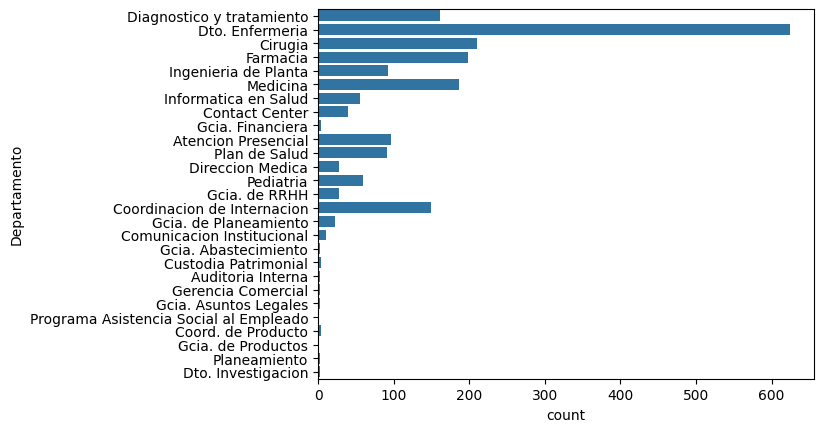

In [43]:
sns.countplot(data=df, y='Departamento')

### creo columna Dtos_Importantes con agrupamiento 'Otros'

In [44]:
# Paso 1: Calcular la cantidad de requerimientos por categoría
requerimientos_por_categoria = df['Departamento'].value_counts()

# Paso 2: Definir un umbral
umbral = 10  # Por ejemplo, categorías con menos de 10 requerimientos serán "Otros"

# Paso 3: Identificar categorías representativas
categorias_representativas = requerimientos_por_categoria[requerimientos_por_categoria >= umbral].index.tolist()

# Paso 4: Crear la nueva columna 'Categoria General'
df['Dtos_Importantes'] = df['Departamento'].apply(
    lambda x: x if x in categorias_representativas else 'Otros'
)


<Axes: xlabel='count', ylabel='Dtos_Importantes'>

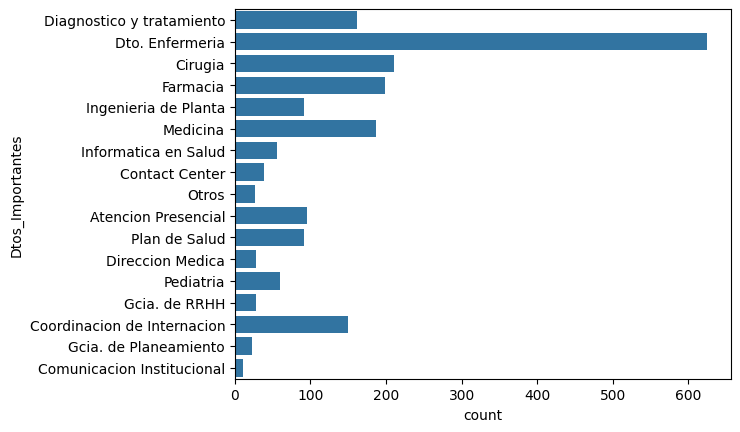

In [45]:
sns.countplot(data=df, y='Dtos_Importantes')

### Limpio Luguar

In [46]:
df['lugar'].unique()

array(['HI', 'Periferico', 'Central', 'HIAR', 'PEriferico'], dtype=object)

<Axes: xlabel='count', ylabel='lugar'>

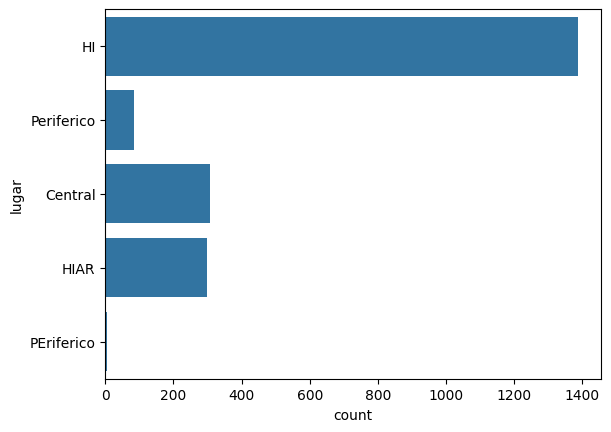

In [47]:
sns.countplot(data=df,y='lugar')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 130 to 2209
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nro_Reque             2080 non-null   int64         
 1   id_UO                 2080 non-null   object        
 2   Departamento          2080 non-null   object        
 3   Sector                2080 non-null   object        
 4   Sección               2080 non-null   object        
 5   Categoria             2080 non-null   object        
 6   id_Puesto             2080 non-null   object        
 7   A_cargo               2080 non-null   object        
 8   Origen_de_Reque       2080 non-null   object        
 9   Fecha_Recep._Empleos  2080 non-null   datetime64[ns]
 10  Responsable_Sector    2080 non-null   object        
 11  Tipo de ingreso       340 non-null    object        
 12  Puesto                1381 non-null   object        
 13  UO                   

In [49]:
df['lugar'] = df['lugar'].replace({'HI': 'Central'})
df['lugar'] = df['lugar'].replace({'HIAR': 'San_Justo'})


### Limpio Tipo de Ingreso (Plazo Fijo o Indeterminado)

In [50]:
df['Tipo de ingreso'].unique()

array([nan, 'Plazo Fijo', 'plazo fijo', 'PLazo Fijo', 'Plazo Fijoa',
       'Plazo Fijo COVID', 'plazo Fijo', 'Plazo fijo x prueba',
       'Efectivo', 'plazo fijo x prueba', 'Plazo Fijo  '], dtype=object)

<Axes: xlabel='count', ylabel='Tipo de ingreso'>

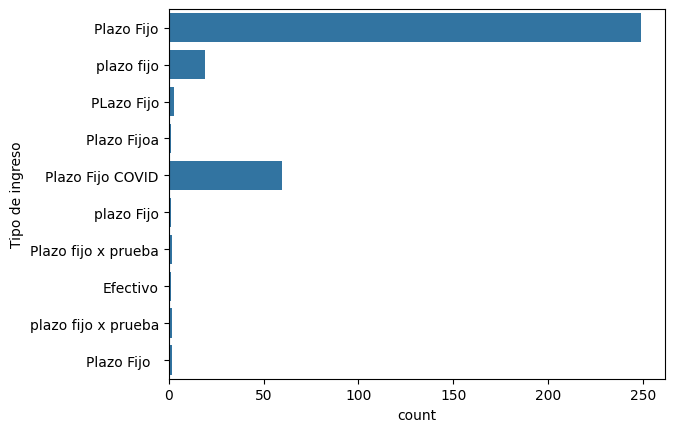

In [51]:
sns.countplot(data=df,y='Tipo de ingreso')

In [52]:
# Reemplazar los valores nulos (NaN) y 'Efectivo' por "Indeterminado"
df['Tipo de ingreso'] = df['Tipo de ingreso'].replace({'Efectivo': 'Indeterminado', np.nan: 'Indeterminado'})

# Ahora reemplazar todo lo demás por "Plazo Fijo", excepto "Plazo Fijo COVID"
df['Tipo de ingreso'] = df['Tipo de ingreso'].apply(lambda x: 'Plazo Fijo' if x != 'Plazo Fijo COVID' and x != 'Indeterminado' else x)

# Verificar los resultados
print(df['Tipo de ingreso'].unique())


['Indeterminado' 'Plazo Fijo' 'Plazo Fijo COVID']


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 130 to 2209
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nro_Reque             2080 non-null   int64         
 1   id_UO                 2080 non-null   object        
 2   Departamento          2080 non-null   object        
 3   Sector                2080 non-null   object        
 4   Sección               2080 non-null   object        
 5   Categoria             2080 non-null   object        
 6   id_Puesto             2080 non-null   object        
 7   A_cargo               2080 non-null   object        
 8   Origen_de_Reque       2080 non-null   object        
 9   Fecha_Recep._Empleos  2080 non-null   datetime64[ns]
 10  Responsable_Sector    2080 non-null   object        
 11  Tipo de ingreso       2080 non-null   object        
 12  Puesto                1381 non-null   object        
 13  UO                   

In [54]:
# Reemplazar nulos en la columna 'UO' por el valor de otro registro con el mismo 'id_UO'
df['UO'] = df.apply(
    lambda row: df[df['id_UO'] == row['id_UO']]['UO'].dropna().iloc[0] 
               if pd.isna(row['UO']) and not df[df['id_UO'] == row['id_UO']]['UO'].dropna().empty 
               else (row['id_UO'] if pd.isna(row['UO']) else row['UO']), 
    axis=1
)

# Reemplazar nulos en la columna 'Puesto' por el valor de otro registro con el mismo 'id_Puesto'
df['Puesto'] = df.apply(
    lambda row: df[df['id_Puesto'] == row['id_Puesto']]['Puesto'].dropna().iloc[0] 
               if pd.isna(row['Puesto']) and not df[df['id_Puesto'] == row['id_Puesto']]['Puesto'].dropna().empty 
               else (row['id_Puesto'] if pd.isna(row['Puesto']) else row['Puesto']), 
    axis=1
)

# Verificar los resultados
print(df[['id_UO', 'UO', 'id_Puesto', 'Puesto']].head())



       id_UO                                   UO id_Puesto  \
130  0348-00                           Radiología   TRD_DXI   
131  0196-50  50 - Central de Emergencias Adultos   ENF_CEA   
132  -622311                3 - Int. Gral Adultos   ENF_IGA   
133  0196-00                           Enfermería   SDC_ENF   
134  0196-CM                              0196-CM   ENF_CEM   

                                      Puesto  
130     Técnico Radiologo - Radiodiagnóstico  
131  Enfermero - Central Emergencias Adultos  
132     Enfermero - Internacion Gral Adultos  
133          Supervisor Docente - Enfermería  
134                                  ENF_CEM  


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 130 to 2209
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nro_Reque             2080 non-null   int64         
 1   id_UO                 2080 non-null   object        
 2   Departamento          2080 non-null   object        
 3   Sector                2080 non-null   object        
 4   Sección               2080 non-null   object        
 5   Categoria             2080 non-null   object        
 6   id_Puesto             2080 non-null   object        
 7   A_cargo               2080 non-null   object        
 8   Origen_de_Reque       2080 non-null   object        
 9   Fecha_Recep._Empleos  2080 non-null   datetime64[ns]
 10  Responsable_Sector    2080 non-null   object        
 11  Tipo de ingreso       2080 non-null   object        
 12  Puesto                2080 non-null   object        
 13  UO                   

### Analizo y limpio Días_para_cobertura

In [56]:
# Filtrar el DataFrame según la condición 'días_para_cobertura == "sin fecha estado vacante"'
df_sin_fecha_estado_vacante = df[df['días_para_cobertura'] == 'sin fecha estado vacante']

# Agrupar por 'Estado_de_la_Vacante' y contar los registros
conteo_sin_estado_vacante = (df_sin_fecha_estado_vacante.groupby('Estado_de_la_Vacante')['Nro_Reque'].count()
                             #.size()                #en lugar de contar una columna podría usar size() directamente
                             .reset_index(name='Conteo')
                             .sort_values(by='Conteo', ascending=False))

# Mostrar el resultado
print(conteo_sin_estado_vacante)


  Estado_de_la_Vacante  Conteo
0  Pre_proceso_empleos      63
2            Reservado      43
1      Proceso Empleos      25


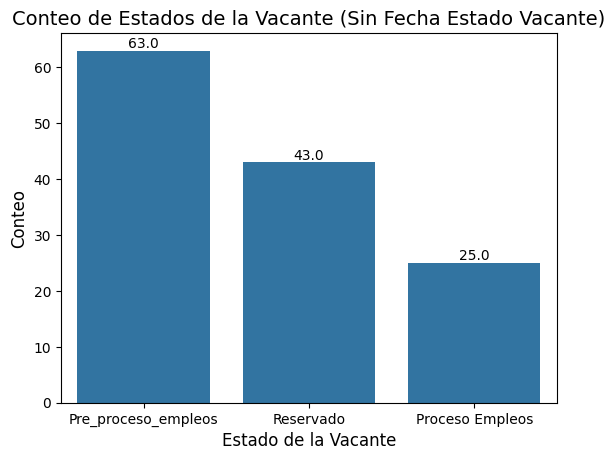

In [57]:
# Filtrar el DataFrame según la condición 'días_para_cobertura == "sin fecha estado vacante"'
df_sin_fecha_estado_vacante = df[df['días_para_cobertura'] == 'sin fecha estado vacante']

order = df_sin_fecha_estado_vacante['Estado_de_la_Vacante'].value_counts().index

ax = sns.countplot(data=df_sin_fecha_estado_vacante,x='Estado_de_la_Vacante', order=order)

#etiquetas
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',  # Texto: altura de la barra
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordenadas: centro de la barra y altura
        ha='center', va='bottom', fontsize=10, color='black'  # Alineación y estilo
    )


# Agregar título y etiquetas
plt.title('Conteo de Estados de la Vacante (Sin Fecha Estado Vacante)', fontsize=14)
plt.xlabel('Estado de la Vacante', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Mostrar el gráfico
plt.show()

In [58]:
len(df[(df.días_para_cobertura == 'sin fecha recibió empleos')])

0

In [59]:
len(df[(df.días_para_cobertura == 'sin fecha estado vacante')])

131

### Creo Fecha de Corte
considero que todas las fechas de estado final de vacante finalizan a la fecha de corte de mi db

In [60]:
# Fecha de corte
fecha_corte = pd.to_datetime('2021-07-29')

# Reemplazar los valores de 'días_para_cobertura' calculando la diferencia
df['días_para_cobertura'] = df.apply(
    lambda row: (fecha_corte - row['Fecha_Recep._Empleos']).days 
    if row['días_para_cobertura'] in ['sin fecha estado vacante', 'sin fecha recibió empleos',np.nan] 
    else row['días_para_cobertura'], 
    axis=1
)

# Convertir la columna a numérica (si es necesario)
df['días_para_cobertura'] = pd.to_numeric(df['días_para_cobertura'], errors='coerce')
df.isnull().sum()


Nro_Reque               0
id_UO                   0
Departamento            0
Sector                  0
Sección                 0
Categoria               0
id_Puesto               0
A_cargo                 0
Origen_de_Reque         0
Fecha_Recep._Empleos    0
Responsable_Sector      0
Tipo de ingreso         0
Puesto                  0
UO                      0
Equipo Selector         0
Estado_de_la_Vacante    0
lugar                   0
días_para_cobertura     0
Dtos_Importantes        0
dtype: int64

In [61]:
df[df['días_para_cobertura'].isnull()]

,Nro_Reque,id_UO,Departamento,Sector,Sección,Categoria,id_Puesto,A_cargo,Origen_de_Reque,Fecha_Recep._Empleos,Responsable_Sector,Tipo de ingreso,Puesto,UO,Equipo Selector,Estado_de_la_Vacante,lugar,días_para_cobertura,Dtos_Importantes


### Limpio Estado_de_la_Vacante

In [62]:
df['Estado_de_la_Vacante'] = df['Estado_de_la_Vacante'].replace('cubierto','Cubierto')

Text(0.5, 1.0, 'Requerimientos según Estados de la Vacante')

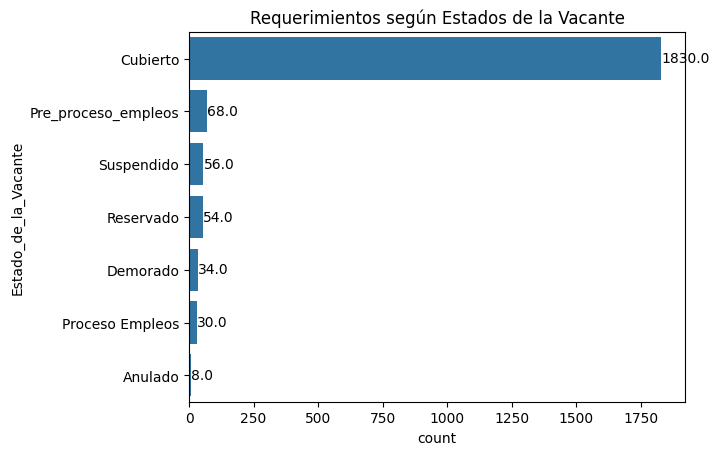

In [63]:
order = df['Estado_de_la_Vacante'].value_counts().index
ax = sns.countplot(data=df,y='Estado_de_la_Vacante', order= order)
#etiquetas
for p in ax.patches:
    ax.annotate(
        f'{p.get_width()}',  # Texto: ancho de la barra
        (p.get_width(), p.get_y() + p.get_height() / 2),  # Coordenadas: extremo derecho y centro de la barra
        ha='left', va='center', fontsize=10, color='black'  # Alineación y estilo
    )

plt.title('Requerimientos según Estados de la Vacante')


### Analizo Estados_de_la_Vacante sin Estado: Cubierto

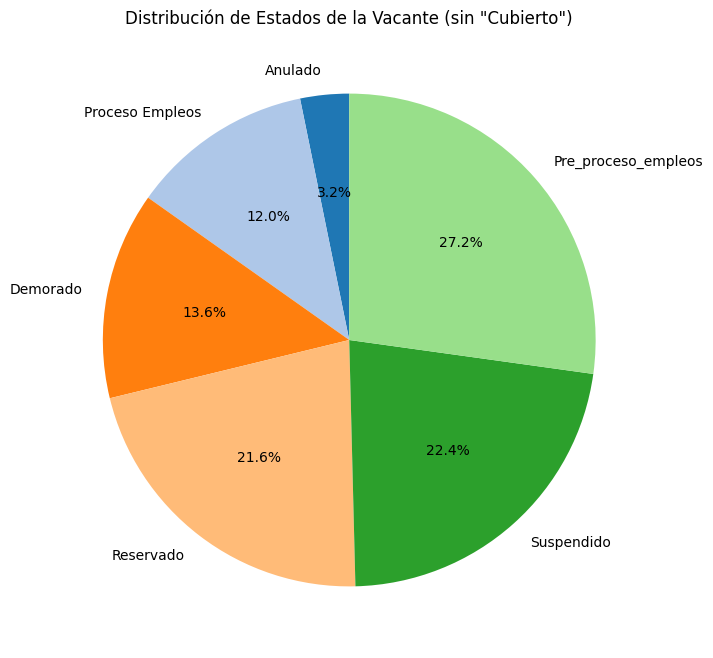

In [64]:
# Filtrar las categorías excluyendo 'Disponible'
df_filtrado = df[df['Estado_de_la_Vacante'] != 'Cubierto']

# Contar los valores por categoría
conteo = df_filtrado['Estado_de_la_Vacante'].value_counts(ascending=True)

# Crear la gráfica de pie
plt.figure(figsize=(8, 8))
plt.pie(
    conteo, 
    labels=conteo.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.tab20.colors  # Colores predefinidos
)
plt.title('Distribución de Estados de la Vacante (sin "Cubierto")')
plt.show()


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 130 to 2209
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nro_Reque             2080 non-null   int64         
 1   id_UO                 2080 non-null   object        
 2   Departamento          2080 non-null   object        
 3   Sector                2080 non-null   object        
 4   Sección               2080 non-null   object        
 5   Categoria             2080 non-null   object        
 6   id_Puesto             2080 non-null   object        
 7   A_cargo               2080 non-null   object        
 8   Origen_de_Reque       2080 non-null   object        
 9   Fecha_Recep._Empleos  2080 non-null   datetime64[ns]
 10  Responsable_Sector    2080 non-null   object        
 11  Tipo de ingreso       2080 non-null   object        
 12  Puesto                2080 non-null   object        
 13  UO                   

In [66]:
df_cubiertos = df[df['Estado_de_la_Vacante'] == 'Cubierto']


In [67]:
df_cubiertos['días_para_cobertura'] = df_cubiertos['días_para_cobertura'].astype(int) 

C:\Users\jodri\AppData\Local\Temp\ipykernel_39244\2743696215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cubiertos['días_para_cobertura'] = df_cubiertos['días_para_cobertura'].astype(int)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 130 to 2209
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nro_Reque             2080 non-null   int64         
 1   id_UO                 2080 non-null   object        
 2   Departamento          2080 non-null   object        
 3   Sector                2080 non-null   object        
 4   Sección               2080 non-null   object        
 5   Categoria             2080 non-null   object        
 6   id_Puesto             2080 non-null   object        
 7   A_cargo               2080 non-null   object        
 8   Origen_de_Reque       2080 non-null   object        
 9   Fecha_Recep._Empleos  2080 non-null   datetime64[ns]
 10  Responsable_Sector    2080 non-null   object        
 11  Tipo de ingreso       2080 non-null   object        
 12  Puesto                2080 non-null   object        
 13  UO                   

# histogramas

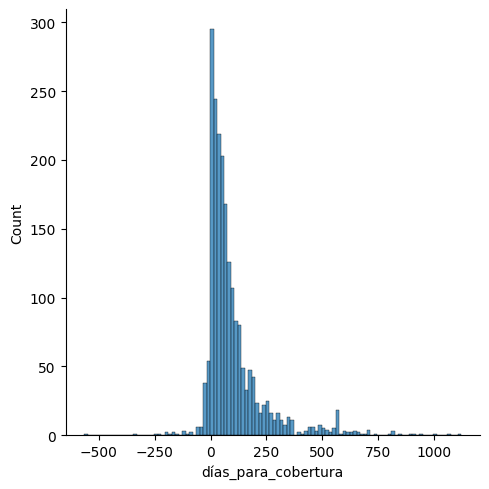

In [69]:
sns.displot(data=df, x='días_para_cobertura')

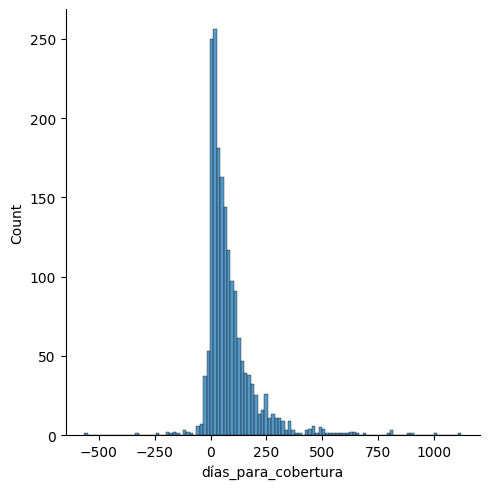

In [70]:
sns.displot(data=df_cubiertos, x='días_para_cobertura')

### Boxplot

<Axes: xlabel='días_para_cobertura'>

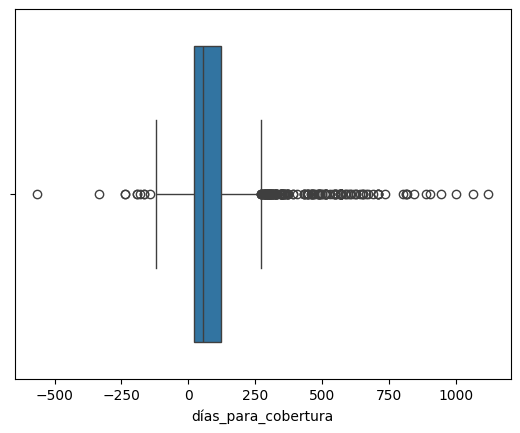

In [71]:
sns.boxplot(data=df, x='días_para_cobertura')

<Axes: xlabel='días_para_cobertura'>

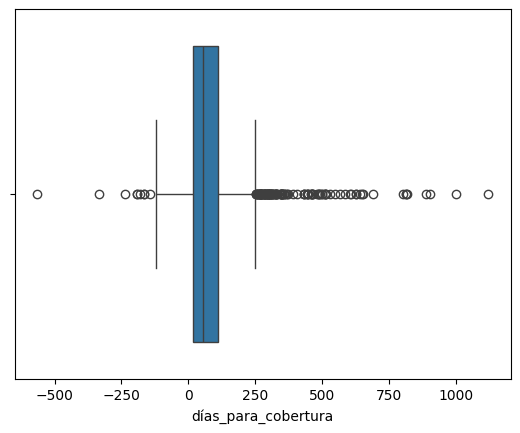

In [72]:
sns.boxplot(data=df_cubiertos, x='días_para_cobertura')

### Analizra outliers ?????

In [73]:
# Contar los registros con días negativos
dias_negativos = df[df['días_para_cobertura'] < 0]
print(f"Número de registros con días negativos: {len(dias_negativos)}")


Número de registros con días negativos: 130


In [74]:
# Filtrar los días negativos
df_sin_dias_negativos = df[df['días_para_cobertura'] >= 0]

# Verificar cuántos registros quedaron
print(f"Número de registros después de eliminar días negativos: {len(df_sin_dias_negativos)}")


Número de registros después de eliminar días negativos: 1950


In [75]:
Q1 = df_sin_dias_negativos['días_para_cobertura'].quantile(0.25)
Q3 = df_sin_dias_negativos['días_para_cobertura'].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango sin outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos sin outliers
df_sin_outliers = df_sin_dias_negativos[(df_sin_dias_negativos['días_para_cobertura'] >= lower_bound) & (df_sin_dias_negativos['días_para_cobertura'] <= upper_bound)]


In [76]:
# winsorización: ajustar valores de datos atípicos para que no estén tan dispersos

In [77]:
print(f"Número de registros después de eliminar días outliers: {len(df_sin_outliers)}")


Número de registros después de eliminar días outliers: 1790


In [78]:
df.describe()

,Nro_Reque,Fecha_Recep._Empleos,días_para_cobertura
count,2080.000000,2080,2080.000000
mean,13271.522115,2019-07-14 01:15:27.692307712,97.545673
min,12069.000000,2018-01-03 00:00:00,-564.000000
25%,12664.750000,2018-08-30 00:00:00,21.000000
50%,13266.500000,2019-05-23 00:00:00,56.000000
75%,13880.500000,2020-03-26 00:00:00,121.250000
max,14565.000000,2021-07-28 00:00:00,1121.000000
std,704.589091,NaN,137.027524


In [79]:
df_sin_outliers.describe()

,Nro_Reque,Fecha_Recep._Empleos,días_para_cobertura
count,1790.000000,1790,1790.000000
mean,13276.693296,2019-07-18 10:40:21.452513792,73.584358
min,12069.000000,2018-01-03 00:00:00,0.000000
25%,12680.250000,2018-08-31 00:00:00,25.000000
50%,13251.500000,2019-05-23 00:00:00,55.000000
75%,13890.750000,2020-03-30 00:00:00,105.000000
max,14565.000000,2021-07-28 00:00:00,283.000000
std,705.497232,NaN,64.105841


<Axes: xlabel='días_para_cobertura', ylabel='Origen_de_Reque'>

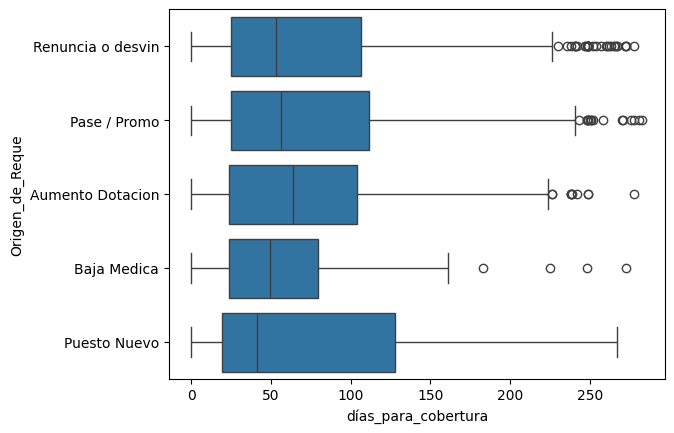

In [80]:
sns.boxplot(y='Origen_de_Reque', x='días_para_cobertura', data=df_sin_outliers)


# BD sin negativos ni outliers

<Axes: xlabel='días_para_cobertura', ylabel='Count'>

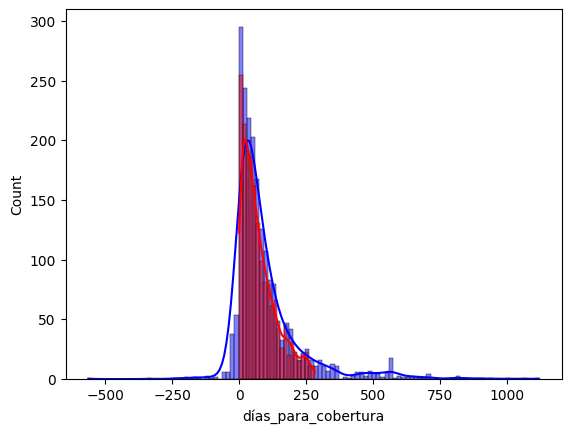

In [81]:
# Comparar con los datos originales
sns.histplot(df['días_para_cobertura'], kde=True, color='blue', label='Original')
sns.histplot(df_sin_outliers['días_para_cobertura'], kde=True, color='red', label='Sin Outliers')


In [82]:
df_cubiertos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 130 to 2199
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Nro_Reque             1830 non-null   int64         
 1   id_UO                 1830 non-null   object        
 2   Departamento          1830 non-null   object        
 3   Sector                1830 non-null   object        
 4   Sección               1830 non-null   object        
 5   Categoria             1830 non-null   object        
 6   id_Puesto             1830 non-null   object        
 7   A_cargo               1830 non-null   object        
 8   Origen_de_Reque       1830 non-null   object        
 9   Fecha_Recep._Empleos  1830 non-null   datetime64[ns]
 10  Responsable_Sector    1830 non-null   object        
 11  Tipo de ingreso       1830 non-null   object        
 12  Puesto                1830 non-null   object        
 13  UO                   

# Estadísticos

In [83]:
df.columns

Index(['Nro_Reque', 'id_UO', 'Departamento', 'Sector', 'Sección', 'Categoria',
       'id_Puesto', 'A_cargo', 'Origen_de_Reque', 'Fecha_Recep._Empleos',
       'Responsable_Sector', 'Tipo de ingreso', 'Puesto', 'UO',
       'Equipo Selector', 'Estado_de_la_Vacante', 'lugar',
       'días_para_cobertura', 'Dtos_Importantes'],
      dtype='object')

# COLUMNAS FINALES

In [84]:
final_columns = ['Nro_Reque', 'Departamento', 'Sector', 'Sección', 'Categoria', 
                 'A_cargo', 'Origen_de_Reque', 
       'Responsable_Sector', 'Tipo de ingreso', 'Puesto', 'UO',
       'Equipo Selector', 'Estado_de_la_Vacante', 'lugar',
       'días_para_cobertura', 'Dtos_Importantes']

In [85]:
df = df[final_columns]

# COLUMNAS P/ESTADÍSTICAS
Lo mismo que finales sin Nro_Reque ni días_para_cobertura

In [86]:
stats_columns = ['Departamento', 'Sector', 'Sección', 'Categoria', 
                 'A_cargo', 'Origen_de_Reque', 
       'Responsable_Sector', 'Tipo de ingreso', 'Puesto', 'UO',
       'Equipo Selector', 'Estado_de_la_Vacante', 'lugar',
       'Dtos_Importantes']
df_stats = df[stats_columns]

In [87]:
df.isnull().sum()

Nro_Reque               0
Departamento            0
Sector                  0
Sección                 0
Categoria               0
A_cargo                 0
Origen_de_Reque         0
Responsable_Sector      0
Tipo de ingreso         0
Puesto                  0
UO                      0
Equipo Selector         0
Estado_de_la_Vacante    0
lugar                   0
días_para_cobertura     0
Dtos_Importantes        0
dtype: int64

# análisis Normalidad días para cobertura

In [88]:
from scipy.stats import shapiro

# Lista con la columna que quieres analizar
column_to_analyze = ['días_para_cobertura']
gaussian_columns = []  # Columnas que parecen normales
non_gaussian_columns = []  # Columnas que no parecen normales

# Analiza solo la columna 'días_para_cobertura'
for column in column_to_analyze:
    # Elimina valores nulos para evitar errores en el test
    data = df_sin_outliers[column].dropna()
    
    # Aplica el test Shapiro-Wilk
    stat, p = shapiro(data)
    
    # Guarda el resultado en la lista correspondiente
    if p > 0.05:
        gaussian_columns.append(column)  # Probablemente normal
    else:
        non_gaussian_columns.append(column)  # Probablemente no normal
    
    # Imprime el resultado para la columna
    print(f"Columna: {column} -> stat={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print(f"   {column} parece seguir una distribución normal.\n")
    else:
        print(f"   {column} no sigue una distribución normal.\n")


Columna: días_para_cobertura -> stat=0.883, p=0.000
   días_para_cobertura no sigue una distribución normal.



# Kruskal-Wallis H Test
Existen diferencias significativas en los días de cobertura para los grupos de cada columna?

In [89]:
# Kruskal-Wallis H Test
con_diferencia = []
sin_diferencia = []

for columna in stats_columns:        
    # Agrupar los datos por Departamento
    grupos = [grupo['días_para_cobertura'].values 
            for _, grupo in df.groupby(columna)]

    # Aplicar el Kruskal-Wallis Test
    stat, p = kruskal(*grupos)

    # Mostrar resultados
    print(f'Estadístico: {stat:.3f}, p-valor: {p:.3f}')
    if p > 0.05:
        print(f"No hay diferencias significativas en los días de cobertura para los grupos de {columna}.")
        sin_diferencia.append(columna)
    else:
        print(f"Existen diferencias significativas en los días de cobertura para los grupos de {columna}.")
        con_diferencia.append(columna)


Estadístico: 53.238, p-valor: 0.001
Existen diferencias significativas en los días de cobertura para los grupos de Departamento.
Estadístico: 404.990, p-valor: 0.000
Existen diferencias significativas en los días de cobertura para los grupos de Sector.
Estadístico: 567.500, p-valor: 0.002
Existen diferencias significativas en los días de cobertura para los grupos de Sección.
Estadístico: 194.955, p-valor: 0.000
Existen diferencias significativas en los días de cobertura para los grupos de Categoria.
Estadístico: 4.147, p-valor: 0.042
Existen diferencias significativas en los días de cobertura para los grupos de A_cargo.
Estadístico: 14.535, p-valor: 0.006
Existen diferencias significativas en los días de cobertura para los grupos de Origen_de_Reque.
Estadístico: 359.329, p-valor: 0.000
Existen diferencias significativas en los días de cobertura para los grupos de Responsable_Sector.
Estadístico: 16.650, p-valor: 0.000
Existen diferencias significativas en los días de cobertura para los

In [90]:
df['Departamento'].unique()

array(['Diagnostico y tratamiento', 'Dto. Enfermeria', 'Cirugia',
       'Farmacia', 'Ingenieria de Planta', 'Medicina',
       'Informatica en Salud', 'Contact Center', 'Gcia. Financiera',
       'Atencion Presencial', 'Plan de Salud', 'Direccion Medica',
       'Pediatria', 'Gcia. de RRHH', 'Coordinacion de Internacion',
       'Gcia. de Planeamiento', 'Comunicacion Institucional',
       'Gcia. Abastecimiento', 'Custodia Patrimonial',
       'Auditoria Interna', 'Gerencia Comercial', 'Gcia. Asuntos Legales',
       'Programa Asistencia Social al Empleado', 'Coord. de Producto',
       'Gcia. de Productos', 'Planeamiento', 'Dto. Investigacion'],
      dtype=object)

In [91]:
con_diferencia

['Departamento',
 'Sector',
 'Sección',
 'Categoria',
 'A_cargo',
 'Origen_de_Reque',
 'Responsable_Sector',
 'Tipo de ingreso',
 'Puesto',
 'UO',
 'Equipo Selector',
 'Estado_de_la_Vacante',
 'Dtos_Importantes']

In [92]:
sin_diferencia

['lugar']

# Análisis de distribución de Días para cobertura respecto de cada variable categórica

<Axes: xlabel='días_para_cobertura', ylabel='Dtos_Importantes'>

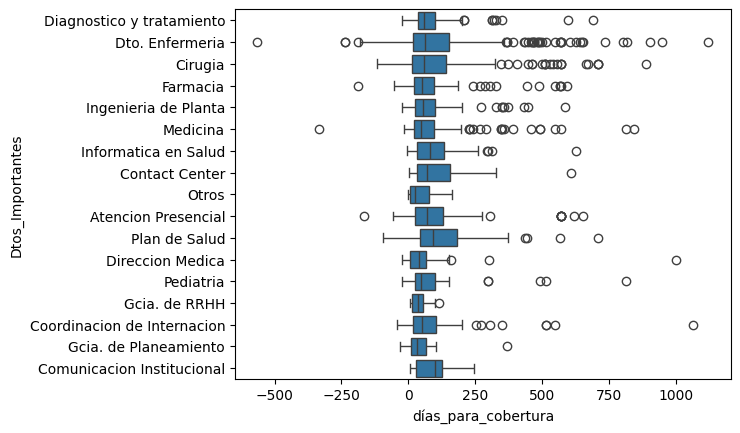

In [93]:
sns.boxplot(data=df, x='días_para_cobertura', y='Dtos_Importantes')

In [94]:
df['A_cargo'].unique()

array(['HI', 'FS'], dtype=object)

<Axes: xlabel='días_para_cobertura', ylabel='A_cargo'>

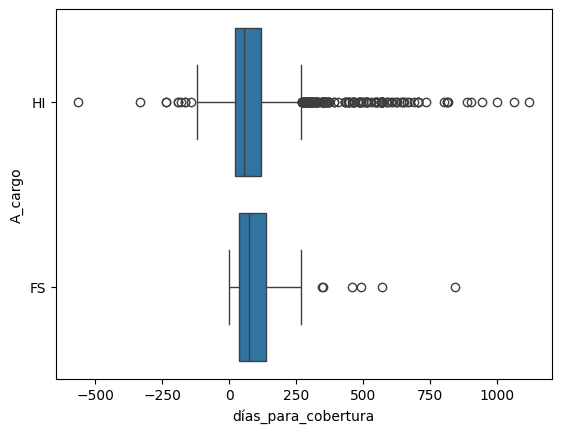

In [95]:
sns.boxplot(data=df, x='días_para_cobertura', y='A_cargo')

<Axes: xlabel='count', ylabel='Origen_de_Reque'>

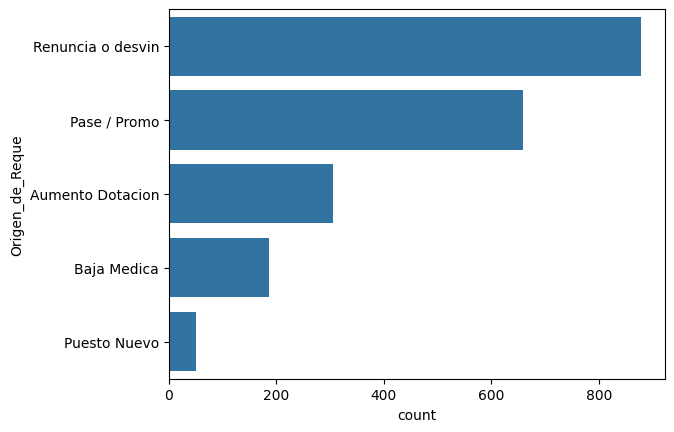

In [96]:
sns.countplot(y='Origen_de_Reque', data=df)

<Axes: xlabel='días_para_cobertura', ylabel='Origen_de_Reque'>

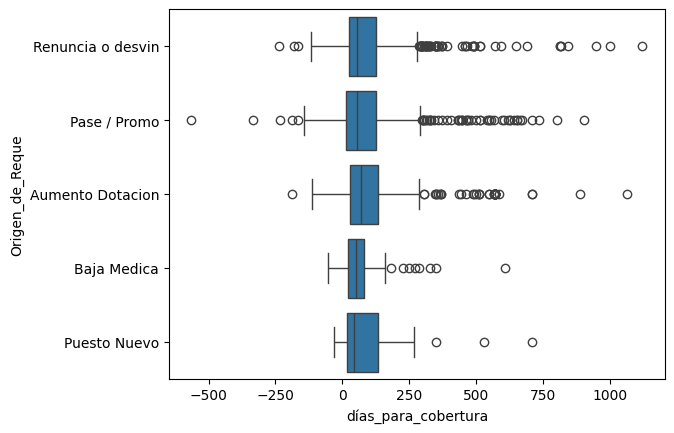

In [97]:
sns.boxplot(data=df, x='días_para_cobertura', y='Origen_de_Reque')

<Axes: xlabel='días_para_cobertura', ylabel='Tipo de ingreso'>

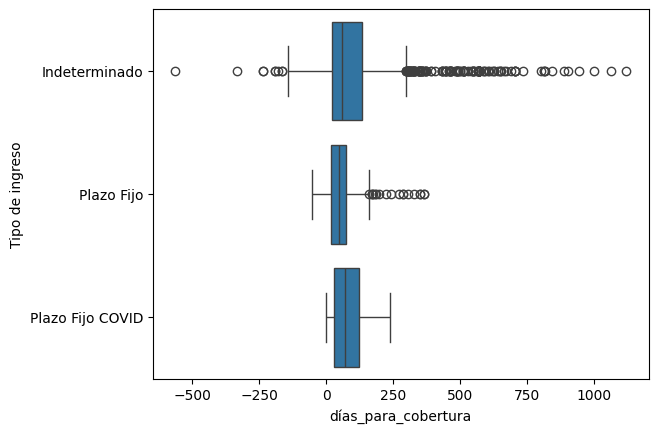

In [98]:
sns.boxplot(data=df, x='días_para_cobertura', y='Tipo de ingreso')

<Axes: xlabel='días_para_cobertura', ylabel='Equipo Selector'>

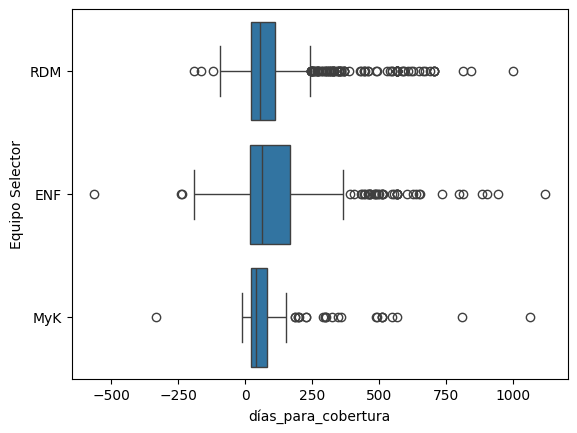

In [99]:
sns.boxplot(data=df, x='días_para_cobertura', y='Equipo Selector')

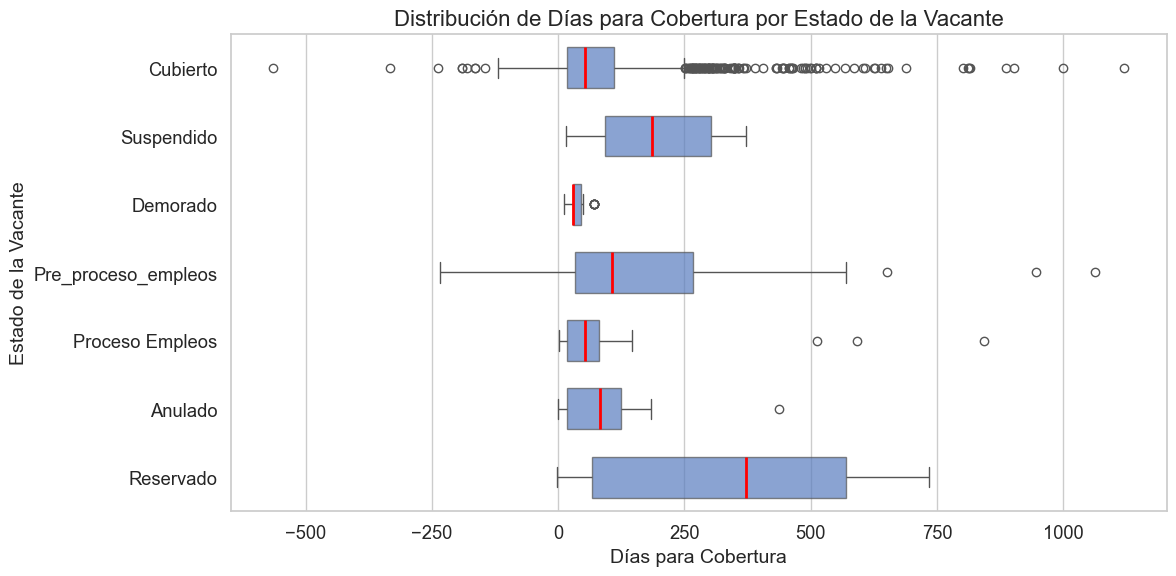

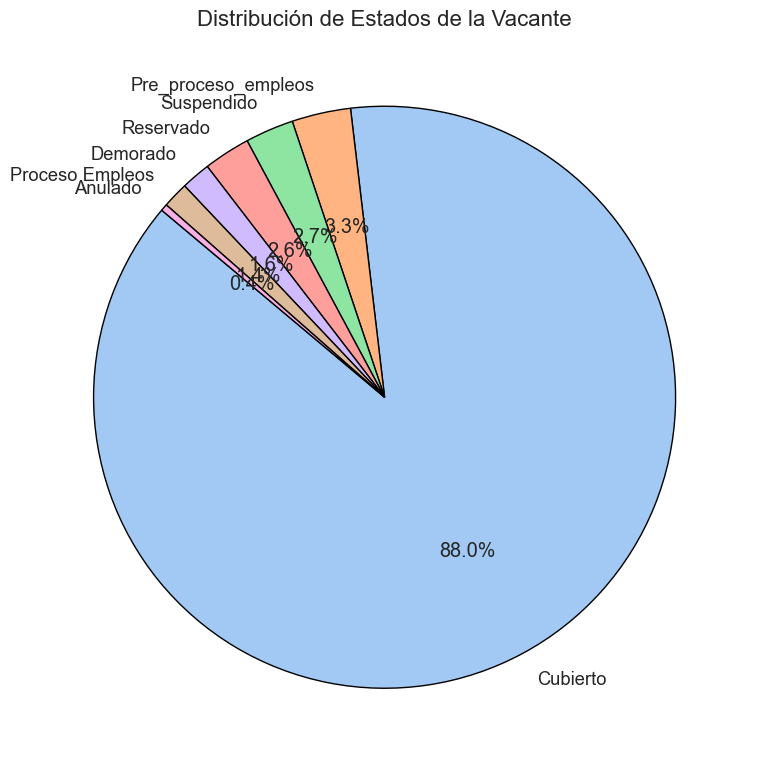

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética para gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Boxplot mejorado
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='días_para_cobertura',
    y='Estado_de_la_Vacante',
    width=0.6,  # Ancho de las cajas
    boxprops=dict(alpha=0.7),  # Transparencia de las cajas
    medianprops=dict(color="red", linewidth=2)  # Líneas de la mediana
)
plt.title('Distribución de Días para Cobertura por Estado de la Vacante', fontsize=16)
plt.xlabel('Días para Cobertura', fontsize=14)
plt.ylabel('Estado de la Vacante', fontsize=14)
plt.tight_layout()  # Ajustar diseño
plt.show()

# Diagrama de pastel para Estado_de_la_Vacante
estado_counts = df['Estado_de_la_Vacante'].value_counts()

# Pie chart mejorado
plt.figure(figsize=(8, 8))
plt.pie(
    estado_counts,
    labels=estado_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}  # Bordes oscuros para mejor visualización
)
plt.title('Distribución de Estados de la Vacante', fontsize=16)
plt.tight_layout()  # Ajustar diseño
plt.show()


<Axes: xlabel='count', ylabel='Estado_de_la_Vacante'>

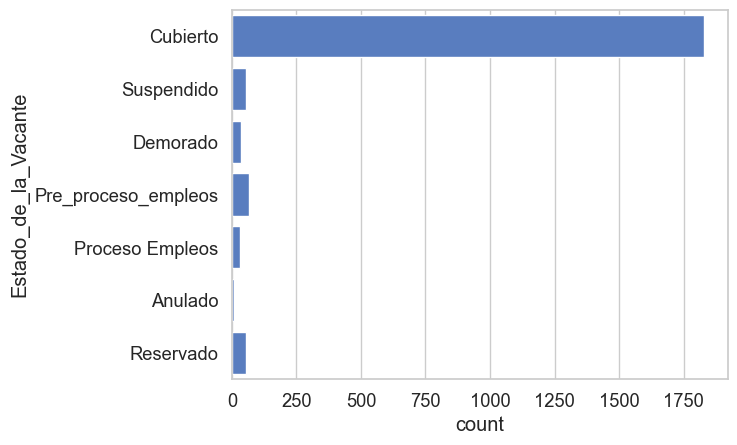

In [101]:
sns.countplot(y='Estado_de_la_Vacante', data=df)


<Axes: xlabel='días_para_cobertura', ylabel='Estado_de_la_Vacante'>

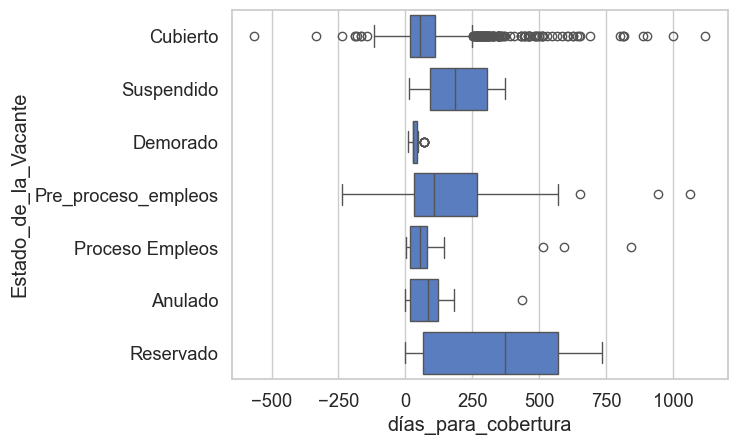

In [102]:
sns.boxplot(data=df, x='días_para_cobertura', y='Estado_de_la_Vacante')

In [103]:
# Supongamos que tu DataFrame se llama df
# Crear una tabla dinámica con las combinaciones de categorías
pivot = df.pivot_table(
    values='días_para_cobertura', 
    index=[ 'Estado_de_la_Vacante','Dtos_Importantes'],  # Las columnas categóricas que deseas combinar
    aggfunc='mean'  # O 'median' si prefieres la mediana
)

# Mostrar las primeras filas para ver cómo se ve la tabla
print(pivot.head(33))


                                                  días_para_cobertura
Estado_de_la_Vacante Dtos_Importantes                                
Anulado              Atencion Presencial                    90.000000
                     Coordinacion de Internacion             0.000000
                     Diagnostico y tratamiento              24.000000
                     Dto. Enfermeria                       205.666667
                     Farmacia                               91.500000
Cubierto             Atencion Presencial                    74.105263
                     Cirugia                                94.175532
                     Comunicacion Institucional             64.142857
                     Contact Center                        103.615385
                     Coordinacion de Internacion            66.021898
                     Diagnostico y tratamiento              74.550336
                     Direccion Medica                       83.360000
                    

In [104]:
# Crear una tabla descriptiva con estadísticas adicionales
descriptive_table = df.groupby(['Departamento', 'A_cargo']).agg(
    media=('días_para_cobertura', 'mean'),
    mediana=('días_para_cobertura', 'median'),
    desvio_estándar=('días_para_cobertura', 'std'),
    total_vacantes=('días_para_cobertura', 'count')  # Por si quieres saber cuántas vacantes hay por grupo
).reset_index()

# Ordenar por tiempo promedio (media) en orden descendente (los que más tardan)
descriptive_table_ordenada_mayor = descriptive_table.sort_values(by='media', ascending=False)

# Ordenar por tiempo promedio (media) en orden ascendente (los que menos tardan)
descriptive_table_ordenada_menor = descriptive_table.sort_values(by='media', ascending=True)

# Obtener las 10 combinaciones que más tardan
top_10_mayor = descriptive_table_ordenada_mayor.head(10)

# Obtener las 10 combinaciones que menos tardan
top_10_menor = descriptive_table_ordenada_menor.head(10)

# Mostrar los resultados
print("Top 10 combinaciones que más tardan:")
print(top_10_mayor)

print("\nTop 10 combinaciones que menos tardan:")
top_10_menor


Top 10 combinaciones que más tardan:
                  Departamento A_cargo       media  mediana  desvio_estándar  \
25                    Medicina      FS  167.583333     97.0       202.839392   
29               Plan de Salud      HI  131.032967     91.0       133.805784   
3                      Cirugia      HI  123.602041     60.5       173.794588   
0          Atencion Presencial      HI  117.645833     70.0       158.085652   
12             Dto. Enfermeria      HI  106.624000     63.0       151.669294   
23        Informatica en Salud      HI  105.046512     75.0       117.134833   
5               Contact Center      HI  103.615385     71.0       111.487695   
16       Gcia. Asuntos Legales      HI  102.500000    102.5        86.974134   
4   Comunicacion Institucional      HI  102.363636    101.0        84.908507   
2                      Cirugia      FS  101.857143     53.5       151.291292   

    total_vacantes  
25              24  
29              91  
3              196 

,Departamento,A_cargo,media,mediana,desvio_estándar,total_vacantes
31,Programa Asistencia Social al Empleado,HI,0.000000,0.0,NaN,1
13,Dto. Investigacion,HI,11.500000,11.5,3.535534,2
30,Planeamiento,HI,15.000000,15.0,12.727922,2
8,Custodia Patrimonial,HI,35.750000,16.5,46.571629,4
6,Coord. de Producto,HI,36.750000,24.0,46.234006,4
1,Auditoria Interna,HI,38.500000,38.5,48.790368,2
20,Gcia. de RRHH,HI,40.642857,36.0,31.287454,28
18,Gcia. de Planeamiento,HI,47.954545,33.5,78.622351,22
17,Gcia. Financiera,HI,48.000000,29.0,52.889823,4
21,Gerencia Comercial,HI,56.500000,56.5,43.133514,2


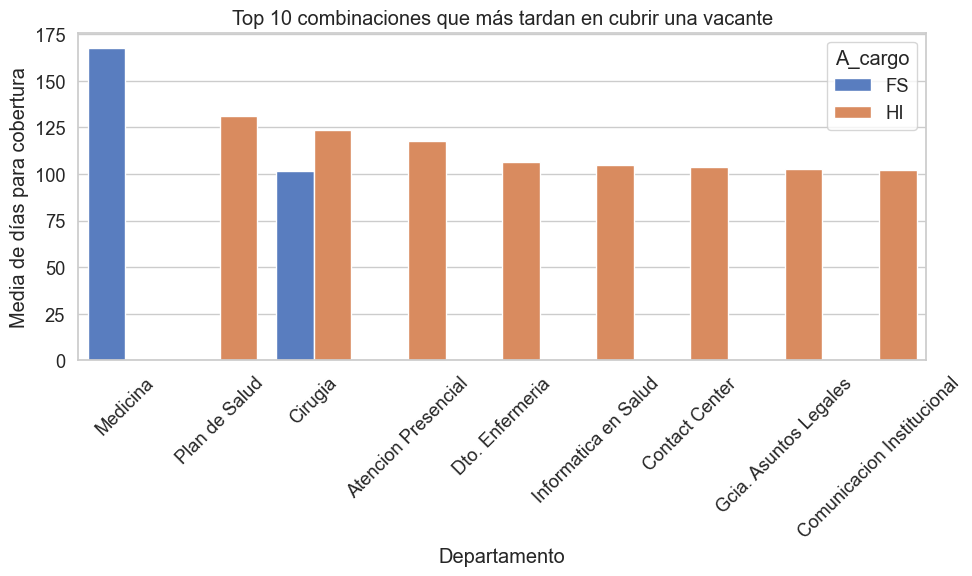

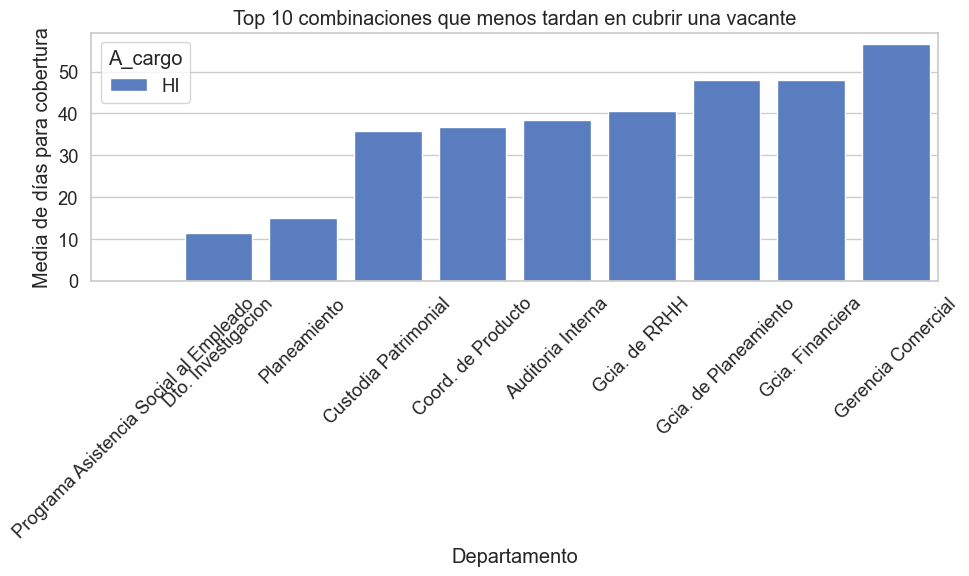

In [105]:
# Gráfico para las 10 combinaciones que más tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_mayor, 
    y='media', 
    x='Departamento', 
    hue='A_cargo'
)
plt.title('Top 10 combinaciones que más tardan en cubrir una vacante')
plt.ylabel('Media de días para cobertura')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para las 10 combinaciones que menos tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_menor, 
    y='media', 
    x='Departamento', 
    hue='A_cargo'
)
plt.title('Top 10 combinaciones que menos tardan en cubrir una vacante')
plt.ylabel('Media de días para cobertura')
plt.xlabel('Departamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [106]:
# Crear una tabla descriptiva con estadísticas adicionales
descriptive_table = df.groupby(['Departamento', 'Origen_de_Reque', 'Estado_de_la_Vacante']).agg(
    media=('días_para_cobertura', 'mean'),
    mediana=('días_para_cobertura', 'median'),
    desvio_estándar=('días_para_cobertura', 'std'),
    total_vacantes=('días_para_cobertura', 'count')  # Número de vacantes por grupo
).reset_index()

# Filtrar para incluir solo combinaciones con al menos 5 vacantes
filtered_table = descriptive_table[descriptive_table['total_vacantes'] >= 5]

# Ordenar por mediana en orden descendente (los que más tardan)
descriptive_table_ordenada_mayor = filtered_table.sort_values(by='mediana', ascending=False)

# Ordenar por mediana en orden ascendente (los que menos tardan)
descriptive_table_ordenada_menor = filtered_table.sort_values(by='mediana', ascending=True)

# Obtener las 10 combinaciones que más tardan
top_10_mayor = descriptive_table_ordenada_mayor.head(10)

# Obtener las 10 combinaciones que menos tardan
top_10_menor = descriptive_table_ordenada_menor.head(10)

# Mostrar los resultados
print("Top 10 combinaciones que más tardan:")
print(top_10_mayor)

print("\nTop 10 combinaciones que menos tardan:")
top_10_menor


Top 10 combinaciones que más tardan:
                    Departamento    Origen_de_Reque Estado_de_la_Vacante  \
2            Atencion Presencial   Aumento Dotacion            Reservado   
175                Plan de Salud  Renuncia o desvin           Suspendido   
88               Dto. Enfermeria       Pase / Promo            Reservado   
67     Diagnostico y tratamiento  Renuncia o desvin           Suspendido   
173                Plan de Salud       Puesto Nuevo             Cubierto   
158                     Medicina  Renuncia o desvin           Suspendido   
154                     Medicina       Puesto Nuevo             Cubierto   
46   Coordinacion de Internacion        Baja Medica             Cubierto   
86               Dto. Enfermeria       Pase / Promo  Pre_proceso_empleos   
133         Informatica en Salud  Renuncia o desvin             Cubierto   

          media  mediana  desvio_estándar  total_vacantes  
2    569.000000    569.0         0.000000               6  
175  2

,Departamento,Origen_de_Reque,Estado_de_la_Vacante,media,mediana,desvio_estándar,total_vacantes
157,Medicina,Renuncia o desvin,Proceso Empleos,136.571429,17.0,311.532693,7
127,Gcia. de RRHH,Renuncia o desvin,Cubierto,34.500000,19.0,33.339848,12
39,Contact Center,Pase / Promo,Cubierto,43.500000,23.5,59.493697,6
141,Ingenieria de Planta,Puesto Nuevo,Cubierto,41.666667,26.0,36.683743,12
109,Farmacia,Renuncia o desvin,Cubierto,53.071429,28.0,57.878826,56
120,Gcia. de Planeamiento,Renuncia o desvin,Cubierto,54.857143,28.5,94.115197,14
19,Cirugia,Baja Medica,Cubierto,45.750000,29.5,57.638473,32
93,Dto. Enfermeria,Renuncia o desvin,Demorado,30.000000,30.0,0.000000,17
3,Atencion Presencial,Baja Medica,Cubierto,54.466667,31.0,64.555476,15
136,Ingenieria de Planta,Aumento Dotacion,Cubierto,82.440000,32.0,142.871177,25


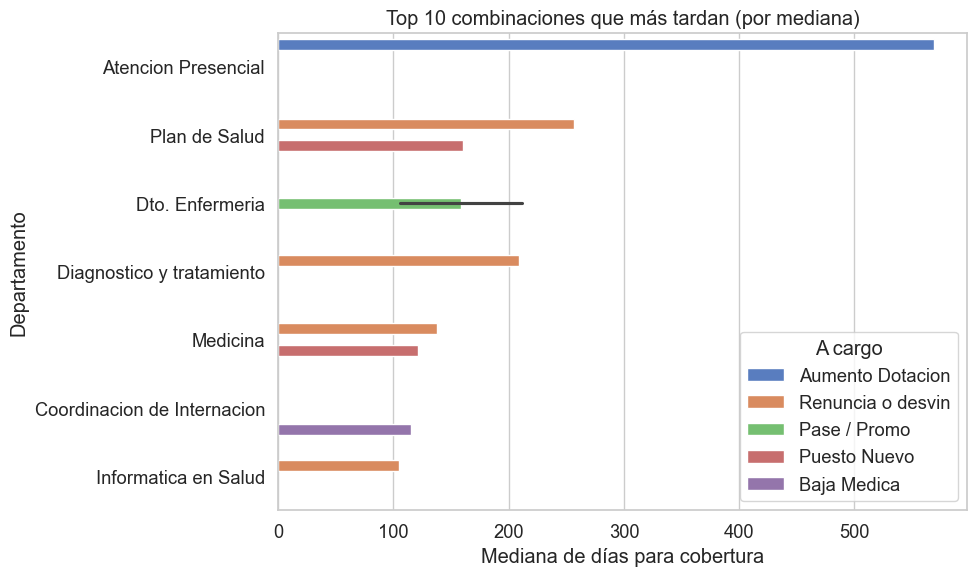

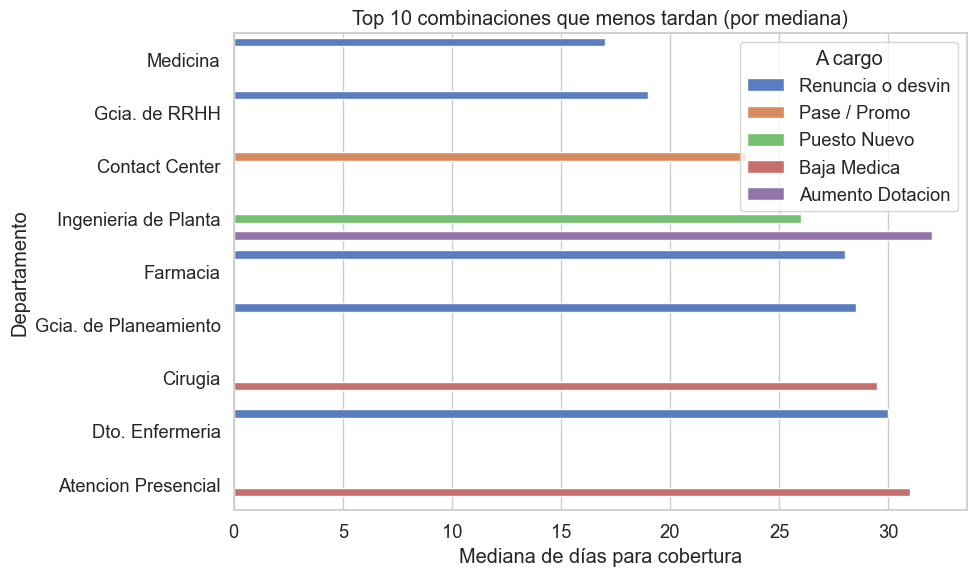

In [107]:
# Gráfico para las 10 combinaciones que más tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_mayor,
    x='mediana',
    y='Departamento',
    hue='Origen_de_Reque'
)
plt.title('Top 10 combinaciones que más tardan (por mediana)')
plt.xlabel('Mediana de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='A cargo')
plt.tight_layout()
plt.show()

# Gráfico para las 10 combinaciones que menos tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_menor,
    x='mediana',
    y='Departamento',
    hue='Origen_de_Reque'
)
plt.title('Top 10 combinaciones que menos tardan (por mediana)')
plt.xlabel('Mediana de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='A cargo')
plt.tight_layout()
plt.show()


In [108]:
# Crear una tabla descriptiva con estadísticas adicionales
descriptive_table = df[df['Estado_de_la_Vacante'] == 'Cubierto'].groupby(['Departamento', 'Origen_de_Reque']).agg(
    media=('días_para_cobertura', 'mean'),
    mediana=('días_para_cobertura', 'median'),
    desvio_estándar=('días_para_cobertura', 'std'),
    total_vacantes=('días_para_cobertura', 'count')  # Número de vacantes por grupo
).reset_index()

# Filtrar para incluir solo combinaciones con al menos 5 vacantes
filtered_table = descriptive_table[descriptive_table['total_vacantes'] >= 5]

# Ordenar por mediana en orden descendente (los que más tardan)
descriptive_table_ordenada_mayor = filtered_table.sort_values(by='mediana', ascending=False)

# Ordenar por mediana en orden ascendente (los que menos tardan)
descriptive_table_ordenada_menor = filtered_table.sort_values(by='mediana', ascending=True)

# Obtener las 10 combinaciones que más tardan
top_10_mayor = descriptive_table_ordenada_mayor.head(10)

# Obtener las 10 combinaciones que menos tardan
top_10_menor = descriptive_table_ordenada_menor.head(10)

# Ampliar la cantidad de columnas mostradas en pandas
pd.set_option('display.max_columns', 10)

# Mostrar los resultados
print("Top 10 combinaciones que más tardan:")
print(top_10_mayor)

print("\nTop 10 combinaciones que menos tardan:")
top_10_menor


Top 10 combinaciones que más tardan:
                   Departamento    Origen_de_Reque       media  mediana  \
83                Plan de Salud       Puesto Nuevo  140.600000    160.0   
73                     Medicina       Puesto Nuevo  125.125000    121.5   
21  Coordinacion de Internacion        Baja Medica  136.166667    115.0   
64         Informatica en Salud  Renuncia o desvin  115.074074    105.0   
6                       Cirugia   Aumento Dotacion  171.666667    104.0   
80                Plan de Salud   Aumento Dotacion  123.941176     98.0   
13   Comunicacion Institucional  Renuncia o desvin   67.800000     98.0   
9                       Cirugia       Puesto Nuevo  144.571429     94.0   
17               Contact Center  Renuncia o desvin  120.352941     91.0   
77                    Pediatria       Pase / Promo   78.400000     91.0   

    desvio_estándar  total_vacantes  
83       100.475370               5  
73       105.714491               8  
21        72.303296    

,Departamento,Origen_de_Reque,media,mediana,desvio_estándar,total_vacantes
59,Gcia. de RRHH,Renuncia o desvin,34.500000,19.0,33.339848,12
16,Contact Center,Pase / Promo,43.500000,23.5,59.493697,6
68,Ingenieria de Planta,Puesto Nuevo,41.666667,26.0,36.683743,12
45,Farmacia,Renuncia o desvin,53.071429,28.0,57.878826,56
54,Gcia. de Planeamiento,Renuncia o desvin,54.857143,28.5,94.115197,14
7,Cirugia,Baja Medica,45.750000,29.5,57.638473,32
1,Atencion Presencial,Baja Medica,54.466667,31.0,64.555476,15
65,Ingenieria de Planta,Aumento Dotacion,82.440000,32.0,142.871177,25
23,Coordinacion de Internacion,Renuncia o desvin,44.514286,34.0,47.014874,70
8,Cirugia,Pase / Promo,106.736842,35.0,136.165016,57


In [109]:
df

,Nro_Reque,Departamento,Sector,Sección,Categoria,...,Equipo Selector,Estado_de_la_Vacante,lugar,días_para_cobertura,Dtos_Importantes
130,12069,Diagnostico y tratamiento,Diagnostico x Imagenes,Radiologia,Tecnico Radiologo,...,RDM,Cubierto,Central,96,Diagnostico y tratamiento
131,12070,Dto. Enfermeria,Sector 50 CEA,Sector 50 CEA,Enfermera,...,ENF,Cubierto,Central,129,Dto. Enfermeria
132,12071,Dto. Enfermeria,Sector 3,Sector 3,Enfermera,...,ENF,Cubierto,Central,31,Dto. Enfermeria
133,12072,Dto. Enfermeria,Enfermeria,Enfermeria,Supervisor,...,ENF,Cubierto,Central,24,Dto. Enfermeria
134,12073,Dto. Enfermeria,Centro de la Mujer,Centro de la Mujer,Enfermera,...,ENF,Cubierto,Central,143,Dto. Enfermeria
...,...,...,...,...,...,...,...,...,...,...,...
2205,14562,Dto. Enfermeria,Volantes,Volantes,ENfermera,...,ENF,Pre_proceso_empleos,Central,6,Dto. Enfermeria
2206,14563,Dto. Enfermeria,HIAR,Volantes,ENfermera,...,ENF,Pre_proceso_empleos,Central,1,Dto. Enfermeria
2207,14564,Dto. Enfermeria,Neonatologia,Neonatologia,ENfermera,...,ENF,Pre_proceso_empleos,Central,1,Dto. Enfermeria
2208,14565,Dto. Enfermeria,Enfermeria,Enfermeria,ENfermera,...,ENF,Pre_proceso_empleos,Central,1,Dto. Enfermeria


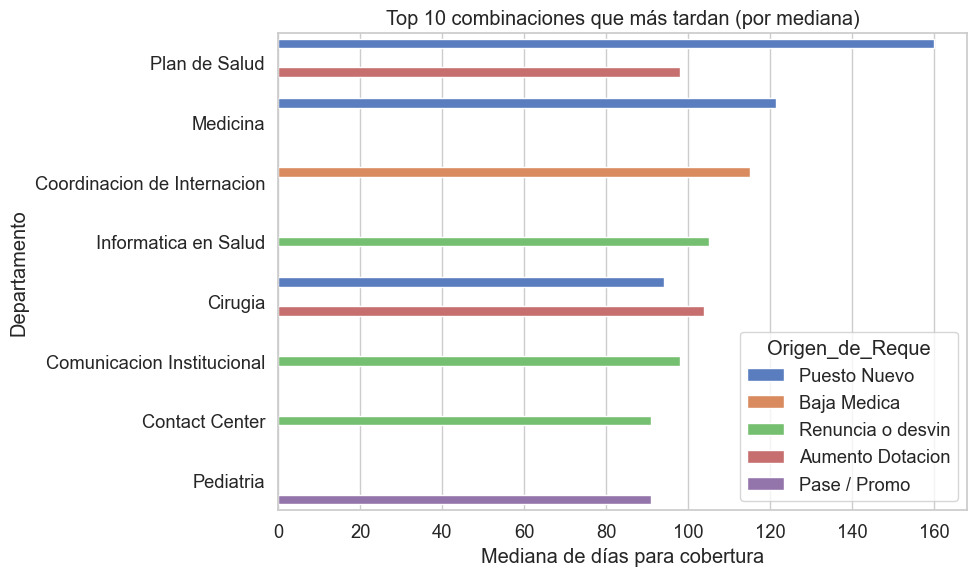

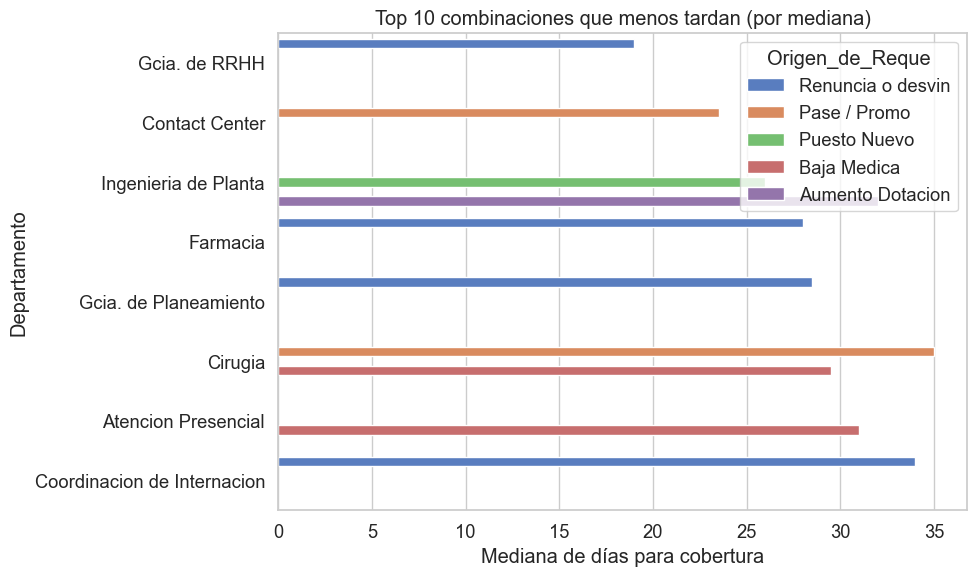

In [110]:
# Gráfico para las 10 combinaciones que más tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_mayor,
    x='mediana',
    y='Departamento',
    hue='Origen_de_Reque'
)
plt.title('Top 10 combinaciones que más tardan (por mediana)')
plt.xlabel('Mediana de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='Origen_de_Reque')
plt.tight_layout()
plt.show()

# Gráfico para las 10 combinaciones que menos tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_menor,
    x='mediana',
    y='Departamento',
    hue='Origen_de_Reque'
)
plt.title('Top 10 combinaciones que menos tardan (por mediana)')
plt.xlabel('Mediana de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='Origen_de_Reque')
plt.tight_layout()
plt.show()


Top 10 combinaciones que más tardan:
                   Departamento Equipo Selector       media  mediana  \
2                       Cirugia             ENF  106.173913    109.0   
29         Informatica en Salud             RDM   85.325581     80.0   
10  Coordinacion de Internacion             RDM   83.188235     76.0   
37                Plan de Salud             RDM   91.194030     74.0   
6                Contact Center             RDM   83.945946     69.0   
16              Dto. Enfermeria             ENF   89.021792     68.0   
35                    Pediatria             RDM   64.950000     66.0   
0           Atencion Presencial             RDM   78.352113     61.0   
13    Diagnostico y tratamiento             RDM   68.751773     56.0   
30         Ingenieria de Planta             RDM   66.213333     55.0   

    desvio_estándar  total_vacantes  
2         83.668530              23  
29        60.057005              43  
10        60.504524              85  
37        69.32799

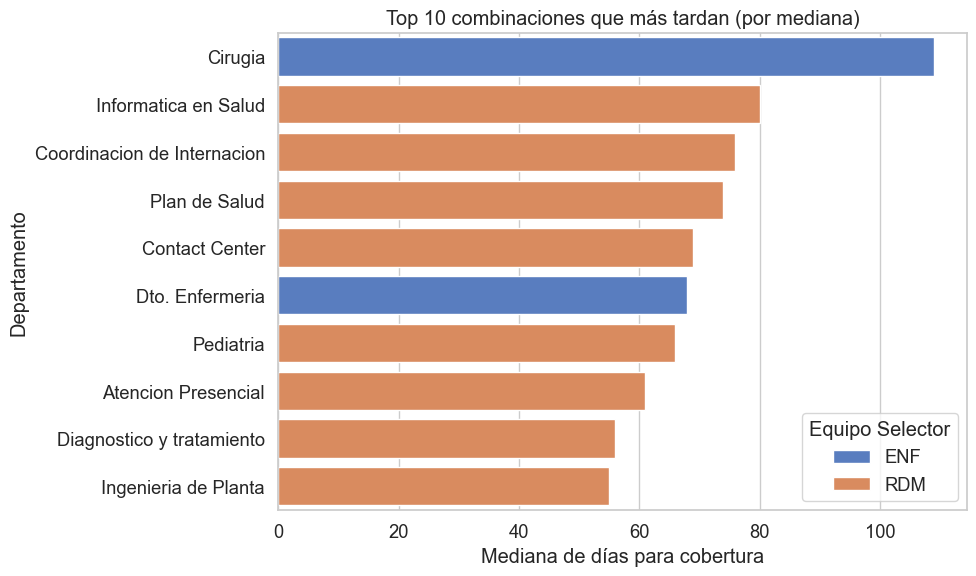

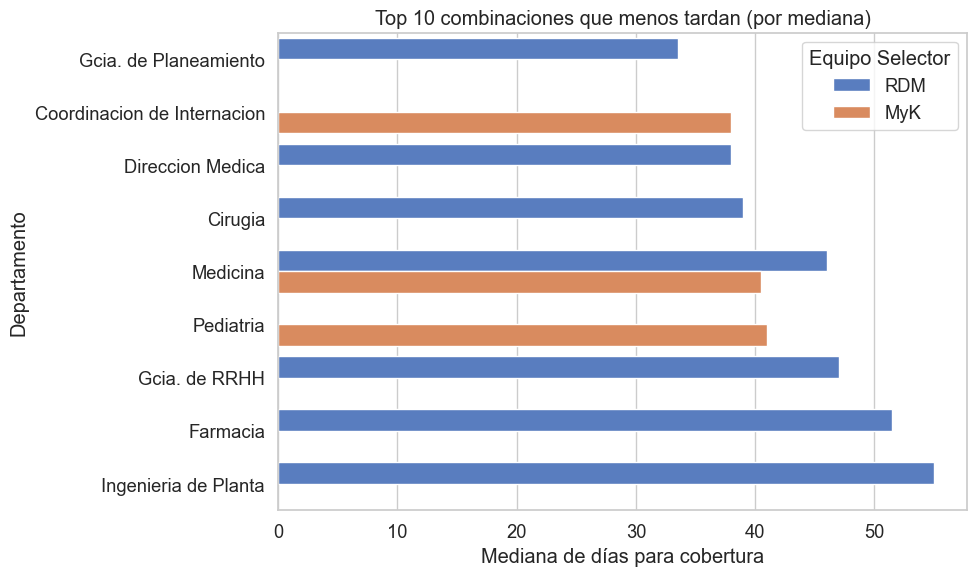

In [111]:
# Crear una tabla descriptiva con estadísticas adicionales
descriptive_table = df_sin_outliers[df_sin_outliers['Estado_de_la_Vacante'] == 'Cubierto'].groupby(['Departamento', 'Equipo Selector']).agg(
    media=('días_para_cobertura', 'mean'),
    mediana=('días_para_cobertura', 'median'),
    desvio_estándar=('días_para_cobertura', 'std'),
    total_vacantes=('días_para_cobertura', 'count')  # Número de vacantes por grupo
).reset_index()

# Filtrar para incluir solo combinaciones con al menos 5 vacantes
filtered_table = descriptive_table[descriptive_table['total_vacantes'] >= 10]

# Ordenar por mediana en orden descendente (los que más tardan)
descriptive_table_ordenada_mayor = filtered_table.sort_values(by='mediana', ascending=False)

# Ordenar por mediana en orden ascendente (los que menos tardan)
descriptive_table_ordenada_menor = filtered_table.sort_values(by='mediana', ascending=True)

# Obtener las 10 combinaciones que más tardan
top_10_mayor = descriptive_table_ordenada_mayor.head(10)

# Obtener las 10 combinaciones que menos tardan
top_10_menor = descriptive_table_ordenada_menor.head(10)

# Ampliar la cantidad de columnas mostradas en pandas
pd.set_option('display.max_columns', 10)

# Mostrar los resultados
print("Top 10 combinaciones que más tardan:")
print(top_10_mayor)

print("\nTop 10 combinaciones que menos tardan:")
top_10_menor


# Gráfico para las 10 combinaciones que más tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_mayor,
    x='mediana',
    y='Departamento',
    hue='Equipo Selector'
)
plt.title('Top 10 combinaciones que más tardan (por mediana)')
plt.xlabel('Mediana de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='Equipo Selector')
plt.tight_layout()
plt.show()

# Gráfico para las 10 combinaciones que menos tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_menor,
    x='mediana',
    y='Departamento',
    hue='Equipo Selector'
)
plt.title('Top 10 combinaciones que menos tardan (por mediana)')
plt.xlabel('Mediana de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='Equipo Selector')
plt.tight_layout()
plt.show()


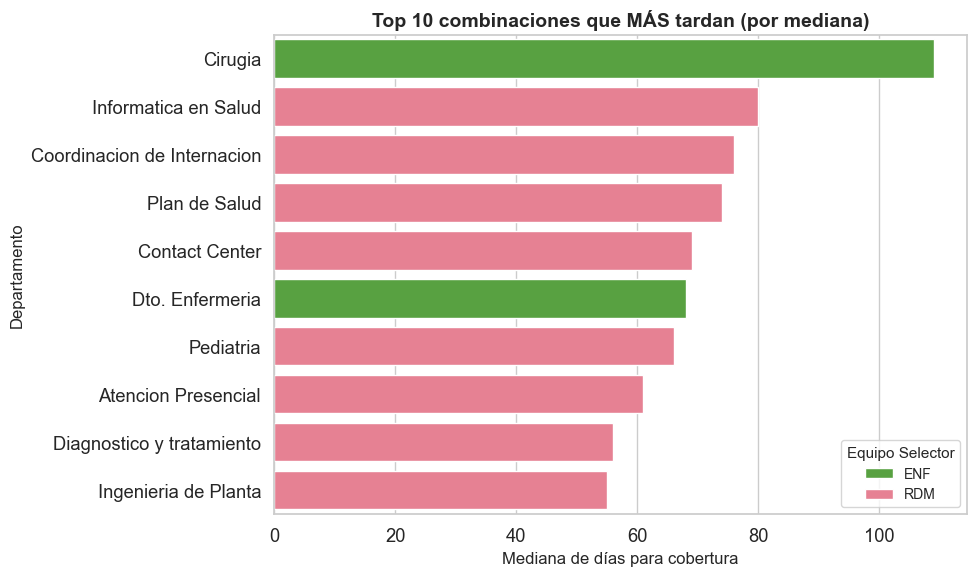

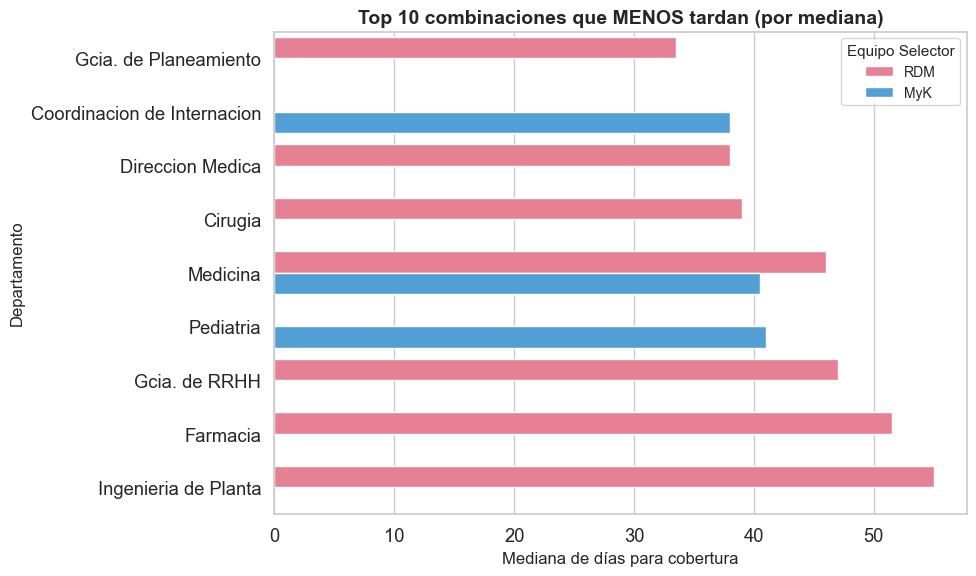

In [112]:
# Crear un mapa de colores fijo para los tres grupos
unique_hues = df_sin_outliers['Equipo Selector'].unique()
palette = sns.color_palette("husl", len(unique_hues))
hue_colors = {hue: color for hue, color in zip(unique_hues, palette)}

# Gráfico para las 10 combinaciones que más tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_mayor,
    x='mediana',
    y='Departamento',
    hue='Equipo Selector',
    palette=hue_colors  # Fijar los colores
)
plt.title('Top 10 combinaciones que MÁS tardan (por mediana)', fontsize=14, weight='bold')
plt.xlabel('Mediana de días para cobertura', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.legend(title='Equipo Selector', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

# Gráfico para las 10 combinaciones que menos tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_menor,
    x='mediana',
    y='Departamento',
    hue='Equipo Selector',
    palette=hue_colors  # Fijar los colores
)
plt.title('Top 10 combinaciones que MENOS tardan (por mediana)', fontsize=14, weight='bold')
plt.xlabel('Mediana de días para cobertura', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.legend(title='Equipo Selector', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


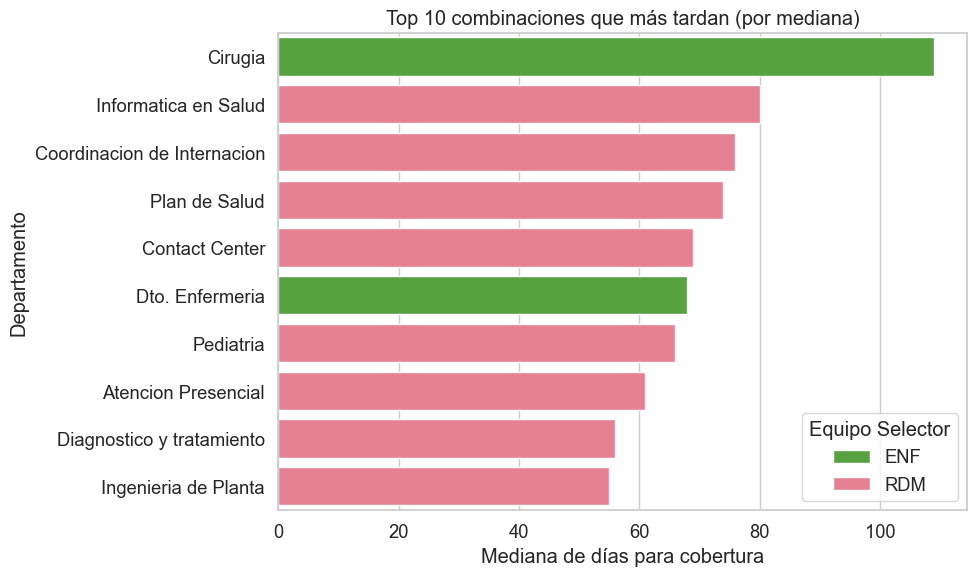

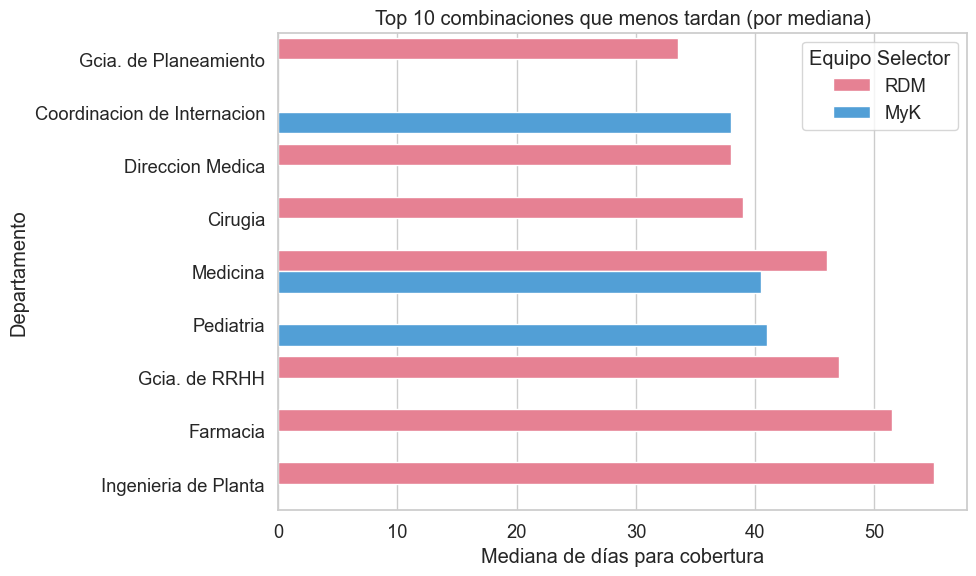

In [113]:
# Crear un mapa de colores fijo para los tres grupos
unique_hues = df_sin_outliers['Equipo Selector'].unique()
palette = sns.color_palette("husl", len(unique_hues))
hue_colors = {hue: color for hue, color in zip(unique_hues, palette)}

# Gráfico para las 10 combinaciones que más tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_mayor,
    x='mediana',
    y='Departamento',
    hue='Equipo Selector',
    palette=hue_colors  # Fijar los colores
)
plt.title('Top 10 combinaciones que más tardan (por mediana)')
plt.xlabel('Mediana de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='Equipo Selector')
plt.tight_layout()
plt.show()

# Gráfico para las 10 combinaciones que menos tardan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_menor,
    x='mediana',
    y='Departamento',
    hue='Equipo Selector',
    palette=hue_colors  # Fijar los colores
)
plt.title('Top 10 combinaciones que menos tardan (por mediana)')
plt.xlabel('Mediana de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='Equipo Selector')
plt.tight_layout()
plt.show()


In [114]:
df[final_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080 entries, 130 to 2209
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nro_Reque             2080 non-null   int64 
 1   Departamento          2080 non-null   object
 2   Sector                2080 non-null   object
 3   Sección               2080 non-null   object
 4   Categoria             2080 non-null   object
 5   A_cargo               2080 non-null   object
 6   Origen_de_Reque       2080 non-null   object
 7   Responsable_Sector    2080 non-null   object
 8   Tipo de ingreso       2080 non-null   object
 9   Puesto                2080 non-null   object
 10  UO                    2080 non-null   object
 11  Equipo Selector       2080 non-null   object
 12  Estado_de_la_Vacante  2080 non-null   object
 13  lugar                 2080 non-null   object
 14  días_para_cobertura   2080 non-null   int64 
 15  Dtos_Importantes      2080 non-null   obj

In [115]:
df['Nro_Reque'] = df['Nro_Reque'].astype(int)

In [116]:
df[final_columns].select_dtypes(include=['object']).columns

Index(['Departamento', 'Sector', 'Sección', 'Categoria', 'A_cargo',
       'Origen_de_Reque', 'Responsable_Sector', 'Tipo de ingreso', 'Puesto',
       'UO', 'Equipo Selector', 'Estado_de_la_Vacante', 'lugar',
       'Dtos_Importantes'],
      dtype='object')

In [117]:
df[final_columns].head(2)

,Nro_Reque,Departamento,Sector,Sección,Categoria,...,Equipo Selector,Estado_de_la_Vacante,lugar,días_para_cobertura,Dtos_Importantes
130,12069,Diagnostico y tratamiento,Diagnostico x Imagenes,Radiologia,Tecnico Radiologo,...,RDM,Cubierto,Central,96,Diagnostico y tratamiento
131,12070,Dto. Enfermeria,Sector 50 CEA,Sector 50 CEA,Enfermera,...,ENF,Cubierto,Central,129,Dto. Enfermeria


# (codigo comentado a partir de acá)
intentos que no prosperaron por no poder llegar a una conclusión que pueda interpretar y me sienta cómodo para defender 

In [366]:
# Tablas dinámicas combinando 2 categorías: Estado de la vacante y Departamento

In [ ]:
'''
# Supongamos que tu DataFrame se llama df
# Crear una tabla dinámica con las combinaciones de categorías
pivot = df.pivot_table(
    values='días_para_cobertura', 
    index=['Estado_de_la_Vacante', 'Departamento'],  # Las columnas categóricas que deseas combinar
    aggfunc='mean'  # O 'median' si prefieres la mediana
)

# Mostrar las primeras filas para ver cómo se ve la tabla
print(pivot.head(55))
'''

In [368]:
# clusters, no lo uso

In [ ]:
'''

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Paso 1: Convertir las variables categóricas en números
categorical_columns = ['Departamento', 'Categoria', 'A_cargo', 'Estado_de_la_Vacante']  # Puedes ajustar según las columnas que necesites
encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(encoder.fit_transform)

# Paso 2: Preparar los datos para el clustering (incluir las variables de tiempo de cobertura)
X = df[categorical_columns].copy()
X['días_para_cobertura'] = df['días_para_cobertura']

# Paso 3: Aplicar K-means (por ejemplo, 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Paso 4: Examinar los resultados
print(df.groupby('Cluster').agg({
    'días_para_cobertura': ['mean', 'median'],
    'Departamento': 'first',
    'Sector': 'first'
}))
'''


In [ ]:
'''

sns.scatterplot(x='Estado_de_la_Vacante', y='días_para_cobertura', hue='Cluster', data=df)
plt.title('Tiempos de cobertura por Sector y Cluster')
plt.show()
'''


In [371]:
# arbol de decisión, no lo uso

In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Paso 1: Definir las variables independientes (X) y dependiente (y)
X = df.drop(columns=['días_para_cobertura', 'Nro_Reque'])  # Variables independientes
y = df['días_para_cobertura']  # Variable dependiente

# Paso 2: Identificar las columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Asegurar que las columnas categóricas sean tipo string (por si acaso hay problemas de tipo)
X[categorical_columns] = X[categorical_columns].astype(str)

# Paso 3: Aplicar LabelEncoder a las columnas categóricas
encoder = LabelEncoder()

# Aplicamos la transformación a cada columna categórica
X[categorical_columns] = X[categorical_columns].apply(encoder.fit_transform)

# Paso 4: Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Crear y entrenar el modelo de árbol de decisión
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Paso 6: Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    filled=True,
    feature_names=categorical_columns.tolist() + list(X.select_dtypes(exclude=['object']).columns),  # Nombres de las columnas originales
    class_names=[str(cls) for cls in sorted(y.unique())],  # Nombres de las clases (días para cobertura)
    rounded=True,
    proportion=False
)
plt.title("Árbol de decisión: Días para cobertura")
plt.show()
'''


In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Paso 1: Separar características (X) y target (y)
X = df.drop(columns=['días_para_cobertura', 'Nro_Reque'])  # Variables independientes
y = df['días_para_cobertura']  # Variable dependiente (target)

# Paso 2: Identificar columnas categóricas y numéricas
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Asegurar que las columnas categóricas sean tipo string (por si acaso hay problemas de tipo)
X[categorical_columns] = X[categorical_columns].astype(str)

# Paso 3: Configurar el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'  # Mantener las columnas numéricas sin cambios
)

# Transformar las características
X_transformed = preprocessor.fit_transform(X)

# Obtener los nombres de las características transformadas
feature_names = preprocessor.get_feature_names_out()

# Paso 4: Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Paso 5: Crear y entrenar el modelo de árbol de decisión
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Paso 6: Graficar el árbol con nombres descriptivos
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    filled=True,
    feature_names=feature_names,  # Nombres de las características transformadas
    class_names=[str(cls) for cls in sorted(y.unique())]  # Nombres de las clases ordenadas
)
plt.title("Árbol de decisión: Días para cobertura")
plt.show()
'''


In [ ]:
'''
print(feature_names)
'''


In [ ]:
'''
df.head()
'''


In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Paso 1: Separar características (X) y target (y)
X = df.drop(columns=['días_para_cobertura', 'Nro_Reque'])  # Variables independientes
y = df['días_para_cobertura']  # Variable dependiente (target)

# Paso 2: Identificar columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Asegurar que las columnas categóricas sean tipo string
X[categorical_columns] = X[categorical_columns].astype(str)

# Paso 3: Configurar el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Codificar variables categóricas
    ],
    remainder='passthrough'  # Mantener las columnas numéricas sin cambios
)

# Transformar las características
X_transformed = preprocessor.fit_transform(X)

# Obtener los nombres de las características después de la transformación
feature_names = preprocessor.get_feature_names_out()

# Paso 4: Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Paso 5: Crear y entrenar el modelo de árbol de decisión
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Paso 6: Visualizar el árbol con nombres descriptivos
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    filled=True,
    feature_names=feature_names,  # Usar nombres descriptivos
    class_names=[str(cls) for cls in y.unique()]  # Etiquetas de las clases
)
plt.title("Árbol de decisión: Días para cobertura")
plt.show()
'''


In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame es `df`
# Paso 1: Separar características (X) y target (y)
X = df.drop(columns=['días_para_cobertura', 'Nro_Reque'])  # Variables independientes
y = df['días_para_cobertura']  # Variable dependiente (target)

# Paso 2: Identificar columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Convertir las columnas categóricas a strings antes de aplicar el LabelEncoder
le = LabelEncoder()
for c in categorical_columns:
    # Asegúrate de que los valores sean cadenas (strings) para evitar el error
    X[c] = X[c].astype(str)
    X[c] = le.fit_transform(X[c])

# Paso 3: Configurar el preprocesador con OneHotEncoder para las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Codificar variables categóricas
    ],
    remainder='passthrough'  # Mantener las columnas numéricas sin cambios
)

# Paso 4: Transformar las características
X_transformed = preprocessor.fit_transform(X)

# Obtener los nombres de las columnas después de OneHotEncoding
encoded_feature_names = preprocessor.get_feature_names_out()

# Paso 5: Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Paso 6: Crear y entrenar el modelo de árbol de decisión
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Paso 7: Visualizar el árbol con nombres de las características
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    filled=True,
    feature_names=encoded_feature_names,  # Nombres de las características codificadas
    class_names=[str(cls) for cls in y.unique()]  # Etiquetas de las clases
)
plt.title("Árbol de decisión: Días para cobertura")
plt.show()
'''


In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame es `df`
# Paso 1: Separar features (X) y target (y)
X = df.drop(columns=['días_para_cobertura', 'Nro_Reque'])  # Variables independientes
y = df['días_para_cobertura']  # Variable dependiente (target)

# Paso 2: Identificar columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns


# Convertir las columnas categóricas a strings antes de aplicar el LabelEncoder
le = LabelEncoder()
for c in categorical_columns:
    # Asegúrate de que los valores sean cadenas (strings) para evitar el error
    X[c] = X[c].astype(str)
    X[c] = le.fit_transform(X[c])

# Paso 3: Configurar OneHotEncoder dentro de un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Codificar variables categóricas
    ],
    remainder='passthrough'  # Mantener el resto de las columnas sin cambios
)

# Paso 4: Transformar las variables
X_transformed = preprocessor.fit_transform(X)

# Paso 5: Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Paso 6: Crear y entrenar el modelo de árbol de decisión
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Paso 7: Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    filled=True,
    feature_names=preprocessor.get_feature_names_out(),
    class_names=[str(cls) for cls in y.unique()]
)
plt.show()
'''


In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Supongamos que df es tu DataFrame
# Paso 1: Separar features (X) y target (y)
X = df[final_columns].drop(columns=['días_para_cobertura', 'Nro_Reque'])  # Características
y = df['días_para_cobertura']  # Variable objetivo

# Paso 2: Identificar columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Convertir las columnas categóricas a strings antes de aplicar el LabelEncoder
le = LabelEncoder()
for c in categorical_columns:
    # Asegúrate de que los valores sean cadenas (strings) para evitar el error
    X[c] = X[c].astype(str)
    X[c] = le.fit_transform(X[c])


# Paso 3: Convertir las variables categóricas en numéricas utilizando LabelEncoder
le = LabelEncoder()
for c in categorical_columns:
    X[c] = le.fit_transform(X[c])

# Paso 4: Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Crear y ajustar el modelo de árbol de decisión
dt = DecisionTreeRegressor(max_depth=3, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
dt.fit(X_train, y_train)

# Paso 6: Evaluar el modelo
score = dt.score(X_test, y_test)
print(f"R² del modelo: {score:.3f}")

# Paso 7: Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,  # Nombres de las columnas en X (si X es un DataFrame)
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Árbol de Decisión Regresor", fontsize=16)
plt.show()
'''


In [ ]:
'''
# Suponiendo que tu DataFrame es df
# Paso 1: Separar features (X) y target (y)
X = df[final_columns].drop(columns=['días_para_cobertura', 'Nro_Reque']) #independientes
y = df[final_columns]['días_para_cobertura'] # target, dependiente

# Paso 2: Identificar columnas categóricas y numéricas
categorical_columns = X.select_dtypes(include=['object']).columns
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
'''


In [ ]:
'''
categorical_columns
'''


In [ ]:
'''
from sklearn.tree import DecisionTreeClassifier

# Supongamos que tienes X con tus variables predictoras y y con la variable de la categoría de vacante
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualización
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión Clasificador", fontsize=16)
plt.show()

# Ver importancia de las características
importancia = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt.feature_importances_
})
importancia = importancia.sort_values(by='Importance', ascending=False)
print(importancia)
'''


In [ ]:
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Crear el modelo con una profundidad máxima de 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# Ajustar el modelo
dt.fit(X_train, y_train)

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Árbol de Decisión Clasificador", fontsize=16)
plt.show()
'''


In [ ]:
'''
from sklearn.preprocessing import LabelEncoder
'''


In [ ]:
'''
# X = pd.get_dummies(X[categorical_columns]).astype(int)
le = LabelEncoder()
for c in categorical_columns:
    X[c] = X[c].astype(str)
    X[c] = le.fit_transform(X[c])
X.head()
X.isnull().sum()
'''


In [ ]:
'''
X.head(2)
'''


In [ ]:
'''

# Paso 5: Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''

In [ ]:
'''
X.head(2)
'''

In [ ]:

'''
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

'''

In [ ]:
'''

# Paso 7: Evaluar el modelo
score = dt.score(X_test, y_test)
print(f"R² del modelo: {score:.3f}")

# Paso 8: Visualizar el árbol de decisión

# Paso 2: Obtener los nombres de las características
feature_names = X_train.columns

# Crear la visualización
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("Árbol de Decisión Regresor", fontsize=16)
plt.show()

'''

# este muestra importancia de variables 

In [ ]:
'''
# Obtener las importancias
feature_importances = dt.feature_importances_

# Crear un DataFrame para visualizar mejor
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Nombres de las columnas
    'Importance': feature_importances
})

# Ordenar por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias
print(importance_df)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.title('Importancia de las Características', fontsize=16)
plt.gca().invert_yaxis()  # Invertir el eje Y para que la más importante esté arriba
plt.show()
'''

In [ ]:
'''
import numpy as np
import catboost

print(f"Numpy version: {np.__version__}")
print(f"CatBoost version: {catboost.__version__}")
'''

In [ ]:
'''
# Convertir valores a numéricos, reemplazar errores con NaN
df_cubiertos['días_para_cobertura'] = pd.to_numeric(df_cubiertos['días_para_cobertura'], errors='coerce')

# Verificar si hay valores NaN tras la conversión
print(df_cubiertos['días_para_cobertura'].isna().sum())
'''

In [ ]:
'''
# Inspeccionar los valores únicos de la columna
print(df_cubiertos['días_para_cobertura'].unique())
'''

In [ ]:
'''
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Crear el grupo objetivo basado en la columna de días
df['Grupo'] = df['días_para_cobertura'].apply(lambda x: 'Grupo_1' if x < 40 else ('Grupo_2' if x > 90 else None))

# Eliminar filas con None en el grupo (solo queremos menores de 40 o mayores de 90)
df = df.dropna(subset=['Grupo'])

# Manejo de valores nulos en las variables categóricas
categorical_columns = ['Estado_de_la_Vacante', 'Origen_de_Reque', 'Departamento']
for col in categorical_columns:
    df[col].fillna('Desconocido', inplace=True)

# Variables predictoras (las tres categóricas) y objetivo (Grupo)
X = df[categorical_columns]
y = df['Grupo']

# Convertir las columnas categóricas a tipo category (si no lo están)
for col in X.columns:
    X[col] = X[col].astype('category')

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Índices de las columnas categóricas
cat_features = [0, 1, 2]  # Todas son categóricas

# Crear el modelo
model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',  # Ajuste para multiclase
    cat_features=cat_features,
    verbose=50
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
'''

In [ ]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna para clasificar los grupos de días
df['Grupo'] = df['días_para_cobertura'].apply(lambda x: 'Menor_40' if x < 40 else ('Mayor_90' if x > 90 else 'Medio'))

# Agrupar por las combinaciones de variables categóricas y calcular el promedio de días
grouped = df.groupby(['Estado_de_la_Vacante', 'Origen_de_Reque', 'Departamento'])['días_para_cobertura'].mean().reset_index()

# Ordenar por los días promedio
grouped = grouped.sort_values(by='días_para_cobertura', ascending=False)

# Visualización de los datos agrupados
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped,
    x='días_para_cobertura',
    y='Departamento',
    hue='Origen_de_Reque',
    dodge=True
)
plt.title('Promedio de días para cobertura por Departamento y Origen de Requerimiento')
plt.xlabel('Promedio de días para cobertura')
plt.ylabel('Departamento')
plt.legend(title='Origen de Requerimiento')
plt.show()
'''

In [ ]:
'''
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['Origen_de_Reque'], df['dias_cobertura_cat'])

# Realizar el test de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}, p-valor: {p}')
'''

In [ ]:
'''
df['rango_dias'] = np.where(df['días_para_cobertura'] < 40, 'Menos de 40', 
                             np.where(df['días_para_cobertura'] > 90, 'Más de 90', 'Entre 40 y 90'))
'''

In [ ]:
# sns.displot(data=df_cubiertos, x='dias_presentar_reque')

In [ ]:
# sns.displot(data=df, x='dias_presentar_reque')

In [ ]:
# sns.boxplot(data=df,x='dias_presentar_reque')

In [ ]:
'''
columns_to_analyze = ['dias_presentar_reque', 'días_para_cobertura'] 
gaussian_columns = []  # Columnas que parecen normales
non_gaussian_columns = []  # Columnas que no parecen normales


for column in columns_to_analyze:
    # Elimina valores nulos para evitar errores en el test
    data = df_cubiertos[column].dropna()
    
    # Aplica el test Shapiro-Wilk
    stat, p = shapiro(data)
    
    # Guarda el resultado en la lista correspondiente
    if p > 0.05:
        gaussian_columns.append(column)  # Probablemente normal
    else:
        non_gaussian_columns.append(column)  # Probablemente no normal
    
    # Imprime el resultado para cada columna
    print(f"Columna: {column} -> stat={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print(f"   {column} parece seguir una distribución normal.\n")
    else:
        print(f"   {column} no sigue una distribución normal.\n")
'''

### convertir variables categóricas en número  ???
dummies y label encode

spearman

In [ ]:
'''
# Crear una columna con el trimestre y año
df['trimestre_anio'] = df['Fecha_Solicitud'].dt.to_period('Q')  # Por ejemplo: '2023Q1', '2023Q2'

# Agrupar por trimestre y contar la cantidad de requerimientos
df_trimestres = df.groupby('trimestre_anio')['Nro_Reque'].count().reset_index(name='Conteo')

# Graficar la tendencia
plt.figure(figsize=(10, 6))
plt.plot(df_trimestres['trimestre_anio'].astype(str), df_trimestres['Conteo'], marker='o', linestyle='-')
plt.title('Tendencia de Requerimientos por Trimestre', fontsize=16)
plt.xlabel('Trimestre y Año', fontsize=12)
plt.ylabel('Cantidad de Requerimientos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
'''
